In [1]:
from osgeo import ogr, gdal, osr
import pandas as pd
import shapely.wkt
import fiona
import json
import os
import base64
import numpy as np
import boto3
from datacube import Datacube
from datacube.utils.geometry import CRS, Geometry, GeoBox
from datacube.testutils.io import native_geobox, native_load
from datacube.utils.dask import start_local_dask
import rioxarray as rioxr
import awswrangler as wr
from datetime import timedelta, datetime
import dask.dataframe as dd

s3_obj =boto3.client('s3')

In [2]:
dc= Datacube()

In [3]:
ls9_polygons = np.genfromtxt("ls9_underfly_ls8.txt", dtype=str)

In [23]:
# ls9_datasets = wr.s3.list_objects("s3://dea-public-data-dev/test/ls9_wo/ga_ls_wo_3/1-6-0/091/072/2021/11/",
#                                   suffix=[".json"])

# ls9_datasets = wr.s3.list_objects("s3://dea-public-data-dev/baseline/ga_ls9c_ard_3/"+
#                                   a[0][:3]+"/"+a[0][3:], suffix=[".json"]")
                                  
                                

s/
s/
s/


In [247]:
ls9_datasets

Number of CPUs: 96


In [7]:
s3_clientobj = s3_obj.get_object(Bucket='dea-public-data-dev',
                                 Key=ls9_datasets[1].removeprefix("s3://dea-public-data-dev/"))
s3_clientdata = s3_clientobj['Body'].read().decode('utf-8')

In [19]:

# re_list = {}
# ls8_matching = []
# ls9_matching = []
# not_matching_lst = []

# for a in ls9_polygons:       
#     ls9_datasets = wr.s3.list_objects("s3://dea-public-data/baseline/ga_ls9c_ard_3/"+
#                                       a[0][:3]+"/"+a[0][3:], suffix=[".json"])                        
#     for d in ls9_datasets:        
#         s3_clientobj = s3_obj.get_object(Bucket='dea-public-data',
#                                      Key=d.removeprefix("s3://dea-public-data/"))
#         s3_clientdata = s3_clientobj['Body'].read().decode('utf-8') 
#         ls9_time = json.loads(s3_clientdata)["properties"]["datetime"]
#         ls9_time = datetime.fromisoformat(ls9_time.rstrip('Z') + "+00:00")   
#         query_poly = Geometry(json.loads(s3_clientdata)["geometry"], crs="4326")
#         ls8_query = {}
#         ls8_query["geopolygon"] = query_poly
#         if ls9_time > datetime.fromisoformat('2021-12-01T23:59:59+00:00'):
#             continue
#         ls9_crs = json.loads(s3_clientdata)["properties"]["proj:epsg"]                    
#         ls8_query['time'] = (ls9_time-timedelta(days=1),
#                          ls9_time+timedelta(days=1))
#         ls8_datasets = dc.find_datasets(product='ga_ls8c_ard_3', **ls8_query)         
#         ls8_datasets.sort(key=lambda x: x.center_time)                            
#         if ls8_datasets == []:
#             continue
#         else:                       
#             non_matching = [ds for ds in ls8_datasets if ds.crs != CRS(str(ls9_crs))]
#             not_matching_lst.extend(non_matching)
           
#             ls8_datasets = [str(ds.id) for ds in ls8_datasets if ds.crs == CRS(str(ls9_crs))]
#             ls8_matching.extend(ls8_datasets)
#             if ls8_datasets:
#                 ls9_matching.append(json.loads(s3_clientdata).get("id"))
#                 print(f"LS9 {json.loads(s3_clientdata).get('id')} matches LS8: {ls8_datasets}")
#         break
                    

In [244]:
# from dea_tools.plotting import display_map, rgb
# rgb_bands = ['red', 'green', 'blue']
# dsp_9 = dc.load(product='ga_ls9c_ard_3', id='4234113f-5883-4d87-9865-b9816a3c3983', measurements=rgb_bands)
# rgb(dsp_9, bands=rgb_bands, index=0)

In [245]:
# dsp_8 = dc.load(product='ga_ls8c_ard_3', id='8327fd6d-16f7-4db9-977f-98de5795e142', measurements=rgb_bands)
# rgb(dsp_8, bands=rgb_bands, index=0)

In [71]:
ls9_datasets = wr.s3.list_objects("", suffix=[".json"])                                       

In [72]:
len(ls9_datasets)

164

In [3]:
ls9_ard_scenes = list(filter(lambda x: '2021-11' in x, ls9_datasets))

In [4]:
from pathlib import Path

wofs_files = []

for f in ls9_ard_scenes:    
    wofs_files.append(Path(f).name.replace('wo', 'fc'))

In [8]:
path = '/gdata1/projects/landcover/fractional-cover-model/ga_ls_fc_3/ls9_2021_peocessed.txt'

ls9_fc_2021_processed = []
with open(path, "r") as file:
    # Read the file content into a list
    ids = file.readlines()
    
for item in ids:        
    ls9_fc_2021_processed.append(Path(item.rstrip('\n')).name)

In [10]:
len(ls9_fc_2021_processed)

164

In [11]:
set(wofs_files) - set(ls9_fc_2021_processed) 

set()

In [12]:
ls9_nov_scene_ids = []

for d in ls9_ard_scenes:
    s3_clientobj = s3_obj.get_object(Bucket='dea-public-data-dev', Key=d.removeprefix("s3://dea-public-data-dev/"))
    ls9_scene_id = json.loads(s3_clientobj['Body'].read().decode('utf-8'))['properties']['odc:lineage']['ard']
    ls9_nov_scene_ids.append(ls9_scene_id)    

NameError: name 's3_obj' is not defined

In [7]:
with open('ls9_nov_scenes_ids_all.txt', "w") as file:
    # Write each item to the file followed by a newline character
    for item in ls9_nov_scene_ids:        
        file.write(item[0] + "\n")

In [40]:
def decode_credentials(encoded_file):
    with open(encoded_file, 'rb') as f:
        encoded_data = f.read()
        decoded_data = base64.b64decode(encoded_data)
        decoded_credentials = decoded_data.decode('utf-8').split(':')        
        # Assuming format of the file is:
        # access_key_id
        # secret_access_key
        access_key_id = decoded_credentials[0]
        secret_access_key = decoded_credentials[1]
      
        return access_key_id, secret_access_key

## Upload data to S3

In [69]:
def upload_to_s3(local_path, bucket_name, s3_prefix='', extensions=['.tif', '.jpg','.yaml', '.sha1', '.json']):
    access_key_id, secret_access_key = decode_credentials('/home/jovyan/aws.txt')
    # Use the decoded credentials to configure boto3
    s3 = boto3.client(
        's3',
        aws_access_key_id=access_key_id,
        aws_secret_access_key=secret_access_key
    )

    for root, dirs, files in os.walk(local_path):   
        for file in files:      
            if Path(file).suffix in extensions and root.find('pynb_checkpoints') == -1:
                local_file_path = os.path.join(root, file)                            
                s3_file_key = os.path.join(s3_prefix, local_file_path.replace("/gdata1/projects/landcover/fractional-cover-model/", ""))                
                s3.upload_file(local_file_path, bucket_name, s3_file_key)
                print(f"Uploaded {local_file_path} to s3://{bucket_name}/{s3_file_key}")
                            
# Example usage
local_path = '/gdata1/projects/landcover/fractional-cover-model/ga_ls_fc_3/2-5-0/'
bucket_name = 'dea-public-data-dev'
s3_prefix = 'test/ls9_fc/'

upload_to_s3(local_path, bucket_name, s3_prefix)

Uploaded /gdata1/projects/landcover/fractional-cover-model/ga_ls_fc_3/2-5-0/112/079/2021/11/03/ga_ls_fc_3_112079_2021-11-03_interim.odc-metadata.yaml to s3://dea-public-data-dev/test/ls9_fc/ga_ls_fc_3/2-5-0/112/079/2021/11/03/ga_ls_fc_3_112079_2021-11-03_interim.odc-metadata.yaml
Uploaded /gdata1/projects/landcover/fractional-cover-model/ga_ls_fc_3/2-5-0/112/079/2021/11/03/ga_ls_fc_3_112079_2021-11-03_interim.sha1 to s3://dea-public-data-dev/test/ls9_fc/ga_ls_fc_3/2-5-0/112/079/2021/11/03/ga_ls_fc_3_112079_2021-11-03_interim.sha1
Uploaded /gdata1/projects/landcover/fractional-cover-model/ga_ls_fc_3/2-5-0/112/079/2021/11/03/ga_ls_fc_3_112079_2021-11-03_interim_bs.tif to s3://dea-public-data-dev/test/ls9_fc/ga_ls_fc_3/2-5-0/112/079/2021/11/03/ga_ls_fc_3_112079_2021-11-03_interim_bs.tif
Uploaded /gdata1/projects/landcover/fractional-cover-model/ga_ls_fc_3/2-5-0/112/079/2021/11/03/ga_ls_fc_3_112079_2021-11-03_interim.stac-item.json to s3://dea-public-data-dev/test/ls9_fc/ga_ls_fc_3/2-5-0/1

In [17]:
cmds = []

with open("/home/jovyan/dea-notebooks/Scientific_workflows/LS9_FC/ls9_nov_scene_ids_2.txt", "r") as file:
    # Read the file content into a list
    ids = file.readlines()
    
for idx in ids:
    idx = idx.rstrip('\n')
    cmds.append(f'datacube-alchemist run-one -u {idx} -c /home/jovyan/ls9_fc_config.yaml')


In [23]:
len(cmds)

105

In [18]:
# len(ls9_nov_scene_ids)

In [24]:
import multiprocessing
import subprocess

def run_command(command):
    """Function to run a bash command."""
    subprocess.run(command, shell=True)
    print(command)
    print("")
    

# Create a list of commands (you can add more commands if needed)
num_cpus = multiprocessing.cpu_count()
print(num_cpus)

# Create a multiprocessing pool with the number of CPUs
with multiprocessing.Pool(processes=10) as pool:
    # Execute the commands using the pool
    results = pool.map_async(run_command, cmds)

    # Wait for all tasks to finish
    results.wait()

    # Check if all tasks have been completed
    if results.ready():
        print("All tasks have been completed.")

64
2024-03-27 07:40:06 [info     ] Task commencing                task=AlchemistTask(dataset=Dataset <id=57017368-fcf3-446f-bd15-bdc19db45651 product=ga_ls9c_ard_3 location=s3://dea-public-data/baseline/ga_ls9c_ard_3/094/074/2021/11/10/ga_ls9c_ard_3-2-1_094074_2021-11-10_final.stac-item.json>, settings=AlchemistSettings(specification=Specification(measurements=['nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2'], transform='fc.virtualproduct.FractionalCover', transform_url='https://github.com/GeoscienceAustralia/fc/', product=None, products=['ga_ls5t_ard_3', 'ga_ls7e_ard_3', 'ga_ls8c_ard_3', 'ga_ls9c_ard_3'], measurement_renames={'nbart_green': 'green', 'nbart_red': 'red', 'nbart_nir': 'nir', 'nbart_swir_1': 'swir1', 'nbart_swir_2': 'swir2'}, transform_args=None, transform_args_per_product={'ga_ls8c_ard_3': {'regression_coefficients': {'blue': [4.1, 0.9747], 'green': [28.9, 0.99779], 'red': [27.4, 1.00446], 'nir': [0.4, 0.98906], 'swir1': [25.6, 0.99467], 'swir2': 

/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)
/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)
/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)
/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)
/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)
/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: in

2024-03-27 07:43:15 [info     ] Loaded and transformed         task=UUID('57017368-fcf3-446f-bd15-bdc19db45651')
2024-03-27 07:43:15 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('57017368-fcf3-446f-bd15-bdc19db45651')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_094074_2021-11-10_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 07:43:15 [info     ] Loaded and transformed         task=UUID('326c98c2-49b2-44e6-9046-220bcc324a4e')
2024-03-27 07:43:15 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('326c98c2-49b2-44e6-9046-220bcc324a4e')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_094072_2021-11-20_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 07:43:17 [info     ] Loaded and transformed         task=UUID('5f892bc0-fce1-4151-b96c-c7b9726156b3')
2024-03-27 07:43:17 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('5f892bc0-fce1-4151-b96c-c7b9726156b3')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_093084_2021-11-05_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 07:43:18 [info     ] Loaded and transformed         task=UUID('b80736fe-8c32-4766-a82d-915d2ae53ab3')
2024-03-27 07:43:18 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('b80736fe-8c32-4766-a82d-915d2ae53ab3')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_094071_2021-11-20_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 07:43:21 [info     ] Loaded and transformed         task=UUID('63fde671-8eb3-4d7a-ae84-31029d64da98')
2024-03-27 07:43:21 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('63fde671-8eb3-4d7a-ae84-31029d64da98')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_094076_2021-11-20_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 07:43:21 [info     ] Loaded and transformed         task=UUID('d45a587c-aada-485b-b5fa-87751f4388cc')
2024-03-27 07:43:21 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('d45a587c-aada-485b-b5fa-87751f4388cc')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_093087_2021-11-05_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 07:43:21 [info     ] Loaded and transformed         task=UUID('745044cb-e655-4ea8-a379-b30082e474db')
2024-03-27 07:43:21 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('745044cb-e655-4ea8-a379-b30082e474db')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_094075_2021-11-20_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 07:43:22 [info     ] Loaded and transformed         task=UUID('5f80dd6d-ff59-40f7-a3c7-363b09dee375')
2024-03-27 07:43:22 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('5f80dd6d-ff59-40f7-a3c7-363b09dee375')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_093081_2021-11-05_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 07:43:23 [info     ] Loaded and transformed         task=UUID('3b58ab2c-d795-4a2e-b8b8-3193934338c4')
2024-03-27 07:43:23 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('3b58ab2c-d795-4a2e-b8b8-3193934338c4')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_094078_2021-11-20_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 07:43:24 [info     ] Finished writing measurements  task=UUID('57017368-fcf3-446f-bd15-bdc19db45651')
2024-03-27 07:43:25 [info     ] Finished writing measurements  task=UUID('326c98c2-49b2-44e6-9046-220bcc324a4e')
2024-03-27 07:43:26 [info     ] Finished writing measurements  task=UUID('5f892bc0-fce1-4151-b96c-c7b9726156b3')
2024-03-27 07:43:26 [info     ] Loaded and transformed         task=UUID('3fdd1ecb-7c83-4233-9729-42372d9bfa7f')
2024-03-27 07:43:26 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('3fdd1ecb-7c83-4233-9729-42372d9bfa7f')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_094077_2021-11-20_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 07:43:28 [info     ] Finished writing measurements  task=UUID('b80736fe-8c32-4766-a82d-915d2ae53ab3')
2024-03-27 07:43:29 [info     ] Finished writing measurements  task=UUID('d45a587c-aada-485b-b5fa-87751f4388cc')
2024-03-27 07:43:30 [info     ] Finished writing measurements  task=UUID('63fde671-8eb3-4d7a-ae84-31029d64da98')
2024-03-27 07:43:31 [info     ] Finished writing measurements  task=UUID('745044cb-e655-4ea8-a379-b30082e474db')
2024-03-27 07:43:32 [info     ] Finished writing measurements  task=UUID('5f80dd6d-ff59-40f7-a3c7-363b09dee375')
2024-03-27 07:43:33 [info     ] Finished writing measurements  task=UUID('3b58ab2c-d795-4a2e-b8b8-3193934338c4')
2024-03-27 07:43:36 [info     ] Finished writing measurements  task=UUID('3fdd1ecb-7c83-4233-9729-42372d9bfa7f')
2024-03-27 07:43:36 [info     ] Wrote thumbnail                task=UUID('57017368-fcf3-446f-bd15-bdc19db45651')
2024-03-27 07:43:36 [info     ] Assembled dataset              metadata_path=PosixPath('/tmp/tmp

/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)
/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)
/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)
/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)
/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)


2024-03-27 07:46:43 [info     ] Loaded and transformed         task=UUID('b2d73cc3-3c00-449a-acc8-ebb9d1efd621')
2024-03-27 07:46:43 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('b2d73cc3-3c00-449a-acc8-ebb9d1efd621')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_094073_2021-11-10_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 07:46:51 [info     ] Loaded and transformed         task=UUID('41792286-650d-408b-91d2-7ca710b22d85')
2024-03-27 07:46:51 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('41792286-650d-408b-91d2-7ca710b22d85')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_094071_2021-11-10_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 07:46:53 [info     ] Finished writing measurements  task=UUID('b2d73cc3-3c00-449a-acc8-ebb9d1efd621')
2024-03-27 07:46:53 [info     ] Loaded and transformed         task=UUID('32756611-ca8e-46f8-badb-796815ec67a5')
2024-03-27 07:46:53 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('32756611-ca8e-46f8-badb-796815ec67a5')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_094072_2021-11-10_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 07:46:56 [info     ] Loaded and transformed         task=UUID('de7ecd59-8a92-469a-a26f-3542ce9d6184')
2024-03-27 07:46:56 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('de7ecd59-8a92-469a-a26f-3542ce9d6184')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_093085_2021-11-05_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 07:46:57 [info     ] Loaded and transformed         task=UUID('c8c423e9-43e5-4950-a37b-96e3d1517afd')
2024-03-27 07:46:57 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('c8c423e9-43e5-4950-a37b-96e3d1517afd')


/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_094074_2021-11-20_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?tit

2024-03-27 07:46:59 [info     ] Loaded and transformed         task=UUID('c82b1d77-4337-4b67-95c0-c6b9d0af6151')
2024-03-27 07:46:59 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('c82b1d77-4337-4b67-95c0-c6b9d0af6151')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_094076_2021-11-10_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 07:47:01 [info     ] Loaded and transformed         task=UUID('3608cf94-06f2-4a9c-b249-5bb6cd37f7a2')
2024-03-27 07:47:01 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('3608cf94-06f2-4a9c-b249-5bb6cd37f7a2')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_094077_2021-11-10_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 07:47:01 [info     ] Finished writing measurements  task=UUID('41792286-650d-408b-91d2-7ca710b22d85')
2024-03-27 07:47:02 [info     ] Loaded and transformed         task=UUID('f946bb97-4a5d-46d4-b8e2-76b6572cbfb0')
2024-03-27 07:47:02 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('f946bb97-4a5d-46d4-b8e2-76b6572cbfb0')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_094079_2021-11-10_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 07:47:03 [info     ] Finished writing measurements  task=UUID('32756611-ca8e-46f8-badb-796815ec67a5')
2024-03-27 07:47:04 [info     ] Loaded and transformed         task=UUID('267e647f-e906-491a-ad12-f5ce333a67f9')
2024-03-27 07:47:04 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('267e647f-e906-491a-ad12-f5ce333a67f9')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_093082_2021-11-05_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 07:47:05 [info     ] Wrote thumbnail                task=UUID('b2d73cc3-3c00-449a-acc8-ebb9d1efd621')
2024-03-27 07:47:05 [info     ] Assembled dataset              metadata_path=PosixPath('/tmp/tmpm9f_hb0q/ga_ls_fc_3/2-5-0/094/073/2021/11/10/ga_ls_fc_3_094073_2021-11-10_interim.odc-metadata.yaml') task=UUID('b2d73cc3-3c00-449a-acc8-ebb9d1efd621')
2024-03-27 07:47:05 [info     ] STAC file written              task=UUID('b2d73cc3-3c00-449a-acc8-ebb9d1efd621')
2024-03-27 07:47:05 [info     ] Writing files to disk          location=PosixPath('/gdata1/projects/landcover/fractional-cover-model/ga_ls_fc_3/2-5-0/094/073/2021/11/10') task=UUID('b2d73cc3-3c00-449a-acc8-ebb9d1efd621')
2024-03-27 07:47:06 [info     ] Finished writing measurements  task=UUID('de7ecd59-8a92-469a-a26f-3542ce9d6184')
2024-03-27 07:47:06 [info     ] Task complete                  task=UUID('b2d73cc3-3c00-449a-acc8-ebb9d1efd621')
datacube-alchemist run-one -u b2d73cc3-3c00-449a-acc8-ebb9d1efd621 -c /home/jov

/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_094078_2021-11-10_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 07:47:14 [info     ] Finished writing measurements  task=UUID('267e647f-e906-491a-ad12-f5ce333a67f9')
2024-03-27 07:47:14 [info     ] Wrote thumbnail                task=UUID('41792286-650d-408b-91d2-7ca710b22d85')
2024-03-27 07:47:14 [info     ] Assembled dataset              metadata_path=PosixPath('/tmp/tmphswwjw55/ga_ls_fc_3/2-5-0/094/071/2021/11/10/ga_ls_fc_3_094071_2021-11-10_interim.odc-metadata.yaml') task=UUID('41792286-650d-408b-91d2-7ca710b22d85')
2024-03-27 07:47:14 [info     ] STAC file written              task=UUID('41792286-650d-408b-91d2-7ca710b22d85')
2024-03-27 07:47:14 [info     ] Writing files to disk          location=PosixPath('/gdata1/projects/landcover/fractional-cover-model/ga_ls_fc_3/2-5-0/094/071/2021/11/10') task=UUID('41792286-650d-408b-91d2-7ca710b22d85')
2024-03-27 07:47:15 [info     ] Task complete                  task=UUID('41792286-650d-408b-91d2-7ca710b22d85')
datacube-alchemist run-one -u 41792286-650d-408b-91d2-7ca710b22d85 -c /home/jov

/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)


2024-03-27 07:50:12 [info     ] Loaded and transformed         task=UUID('5c79fea9-c18e-4b5f-b242-e6bc31092d68')
2024-03-27 07:50:12 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('5c79fea9-c18e-4b5f-b242-e6bc31092d68')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_094073_2021-11-20_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 07:50:22 [info     ] Finished writing measurements  task=UUID('5c79fea9-c18e-4b5f-b242-e6bc31092d68')


/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)
/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)
/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+

2024-03-27 07:50:28 [info     ] Loaded and transformed         task=UUID('a0a9f855-bb31-45d5-a6a2-44e8f0be37fc')
2024-03-27 07:50:28 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('a0a9f855-bb31-45d5-a6a2-44e8f0be37fc')


/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)
/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)


2024-03-27 07:50:30 [info     ] Loaded and transformed         task=UUID('3d4bfa8d-b7c4-4e42-a7ec-33a9d4155225')
2024-03-27 07:50:30 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('3d4bfa8d-b7c4-4e42-a7ec-33a9d4155225')
2024-03-27 07:50:30 [info     ] Loaded and transformed         task=UUID('067fcbea-7e81-4226-9719-c1bcb1475fbe')
2024-03-27 07:50:30 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('067fcbea-7e81-4226-9719-c1bcb1475fbe')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_093086_2021-11-05_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 07:50:34 [info     ] Wrote thumbnail                task=UUID('5c79fea9-c18e-4b5f-b242-e6bc31092d68')
2024-03-27 07:50:34 [info     ] Assembled dataset              metadata_path=PosixPath('/tmp/tmph1qgxb2s/ga_ls_fc_3/2-5-0/094/073/2021/11/20/ga_ls_fc_3_094073_2021-11-20_interim.odc-metadata.yaml') task=UUID('5c79fea9-c18e-4b5f-b242-e6bc31092d68')
2024-03-27 07:50:34 [info     ] STAC file written              task=UUID('5c79fea9-c18e-4b5f-b242-e6bc31092d68')
2024-03-27 07:50:34 [info     ] Writing files to disk          location=PosixPath('/gdata1/projects/landcover/fractional-cover-model/ga_ls_fc_3/2-5-0/094/073/2021/11/20') task=UUID('5c79fea9-c18e-4b5f-b242-e6bc31092d68')
2024-03-27 07:50:35 [info     ] Task complete                  task=UUID('5c79fea9-c18e-4b5f-b242-e6bc31092d68')
datacube-alchemist run-one -u 5c79fea9-c18e-4b5f-b242-e6bc31092d68 -c /home/jovyan/ls9_fc_config.yaml

2024-03-27 07:50:37 [info     ] Loaded and transformed         task=UUID('bbd7dcbb-2820-4

/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_094075_2021-11-10_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 07:50:37 [info     ] Prepared lazy transformation   output_data=<xarray.Dataset>
Dimensions:      (y: 7701, x: 7521)
Coordinates:
  * y            (y) float64 -2.92e+06 -2.921e+06 ... -3.151e+06 -3.152e+06
  * x            (x) float64 1.92e+05 1.92e+05 1.921e+05 ... 4.176e+05 4.176e+05
    spatial_ref  int32 32655
Data variables:
    pv           (y, x) int8 dask.array<chunksize=(4096, 7521), meta=np.ndarray>
    npv          (y, x) int8 dask.array<chunksize=(4096, 7521), meta=np.ndarray>
    bs           (y, x) int8 dask.array<chunksize=(4096, 7521), meta=np.ndarray>
    ue           (y, x) int8 dask.array<chunksize=(4096, 7521), meta=np.ndarray>
Attributes:
    crs:           epsg:32655
    grid_mapping:  spatial_ref task=UUID('1a36a15e-4bca-44c6-991e-a1ab8b2c457a')
2024-03-27 07:50:38 [info     ] Finished writing measurements  task=UUID('a0a9f855-bb31-45d5-a6a2-44e8f0be37fc')
2024-03-27 07:50:39 [info     ] Finished writing measurements  task=UUID('3d4bfa8d-b7c4-4e42-a7ec

/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_093083_2021-11-05_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 07:50:42 [info     ] Loaded and transformed         task=UUID('23f2f7aa-f511-464a-ac67-aeaebf10c06d')
2024-03-27 07:50:42 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('23f2f7aa-f511-464a-ac67-aeaebf10c06d')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_094077_2021-11-15_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 07:50:43 [info     ] Loaded and transformed         task=UUID('a524ed4b-068c-40b7-b7ac-1b8f8d8de2dd')
2024-03-27 07:50:43 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('a524ed4b-068c-40b7-b7ac-1b8f8d8de2dd')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_094076_2021-11-15_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 07:50:45 [info     ] Loaded and transformed         task=UUID('0a7026fc-fad1-4cc3-a27d-86c3a8d136d4')
2024-03-27 07:50:45 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('0a7026fc-fad1-4cc3-a27d-86c3a8d136d4')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_094079_2021-11-15_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 07:50:46 [info     ] Finished writing measurements  task=UUID('bbd7dcbb-2820-4fc2-8c10-1447d4b00977')
2024-03-27 07:50:49 [info     ] Finished writing measurements  task=UUID('865a8efd-5fc3-4fd5-8780-4bc6800ca0b1')
2024-03-27 07:50:50 [info     ] Wrote thumbnail                task=UUID('a0a9f855-bb31-45d5-a6a2-44e8f0be37fc')
2024-03-27 07:50:50 [info     ] Assembled dataset              metadata_path=PosixPath('/tmp/tmpbjkyin3c/ga_ls_fc_3/2-5-0/094/071/2021/11/15/ga_ls_fc_3_094071_2021-11-15_interim.odc-metadata.yaml') task=UUID('a0a9f855-bb31-45d5-a6a2-44e8f0be37fc')
2024-03-27 07:50:50 [info     ] STAC file written              task=UUID('a0a9f855-bb31-45d5-a6a2-44e8f0be37fc')
2024-03-27 07:50:50 [info     ] Writing files to disk          location=PosixPath('/gdata1/projects/landcover/fractional-cover-model/ga_ls_fc_3/2-5-0/094/071/2021/11/15') task=UUID('a0a9f855-bb31-45d5-a6a2-44e8f0be37fc')
2024-03-27 07:50:51 [info     ] Task complete                  task=UUID('a0a9f

/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_094078_2021-11-15_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 07:50:59 [info     ] Wrote thumbnail                task=UUID('bbd7dcbb-2820-4fc2-8c10-1447d4b00977')
2024-03-27 07:50:59 [info     ] Assembled dataset              metadata_path=PosixPath('/tmp/tmpq5_u1d66/ga_ls_fc_3/2-5-0/094/075/2021/11/10/ga_ls_fc_3_094075_2021-11-10_interim.odc-metadata.yaml') task=UUID('bbd7dcbb-2820-4fc2-8c10-1447d4b00977')
2024-03-27 07:50:59 [info     ] STAC file written              task=UUID('bbd7dcbb-2820-4fc2-8c10-1447d4b00977')
2024-03-27 07:50:59 [info     ] Writing files to disk          location=PosixPath('/gdata1/projects/landcover/fractional-cover-model/ga_ls_fc_3/2-5-0/094/075/2021/11/10') task=UUID('bbd7dcbb-2820-4fc2-8c10-1447d4b00977')
2024-03-27 07:51:00 [info     ] Task complete                  task=UUID('bbd7dcbb-2820-4fc2-8c10-1447d4b00977')
datacube-alchemist run-one -u bbd7dcbb-2820-4fc2-8c10-1447d4b00977 -c /home/jovyan/ls9_fc_config.yaml

2024-03-27 07:51:02 [info     ] Task commencing                task=AlchemistTask(dataset

/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)
/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)


2024-03-27 07:53:49 [info     ] Loaded and transformed         task=UUID('1a36a15e-4bca-44c6-991e-a1ab8b2c457a')
2024-03-27 07:53:49 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('1a36a15e-4bca-44c6-991e-a1ab8b2c457a')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_094079_2021-11-20_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 07:53:58 [info     ] Finished writing measurements  task=UUID('1a36a15e-4bca-44c6-991e-a1ab8b2c457a')
2024-03-27 07:54:02 [info     ] Loaded and transformed         task=UUID('c816b72d-d524-4815-8c2f-e21fd2579ef5')
2024-03-27 07:54:02 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('c816b72d-d524-4815-8c2f-e21fd2579ef5')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_094083_2021-11-15_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 07:54:09 [info     ] Loaded and transformed         task=UUID('96ccab09-e242-4c43-b36e-d9f0be05fc31')
2024-03-27 07:54:09 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('96ccab09-e242-4c43-b36e-d9f0be05fc31')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_095073_2021-11-25_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 07:54:09 [info     ] Loaded and transformed         task=UUID('dee6a1d6-34f9-4ee3-b700-5de1b4c85964')
2024-03-27 07:54:09 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('dee6a1d6-34f9-4ee3-b700-5de1b4c85964')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_094080_2021-11-20_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 07:54:10 [info     ] Finished writing measurements  task=UUID('c816b72d-d524-4815-8c2f-e21fd2579ef5')
2024-03-27 07:54:11 [info     ] Wrote thumbnail                task=UUID('1a36a15e-4bca-44c6-991e-a1ab8b2c457a')
2024-03-27 07:54:11 [info     ] Assembled dataset              metadata_path=PosixPath('/tmp/tmpg_swbrrr/ga_ls_fc_3/2-5-0/094/079/2021/11/20/ga_ls_fc_3_094079_2021-11-20_interim.odc-metadata.yaml') task=UUID('1a36a15e-4bca-44c6-991e-a1ab8b2c457a')
2024-03-27 07:54:11 [info     ] STAC file written              task=UUID('1a36a15e-4bca-44c6-991e-a1ab8b2c457a')
2024-03-27 07:54:11 [info     ] Writing files to disk          location=PosixPath('/gdata1/projects/landcover/fractional-cover-model/ga_ls_fc_3/2-5-0/094/079/2021/11/20') task=UUID('1a36a15e-4bca-44c6-991e-a1ab8b2c457a')
2024-03-27 07:54:11 [info     ] Loaded and transformed         task=UUID('8ccd07ae-4938-484a-82c8-a3a6e8b0d51c')
2024-03-27 07:54:11 [info     ] Found dtype=int8 in output data, converting to 

/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_094086_2021-11-10_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

datacube-alchemist run-one -u 1a36a15e-4bca-44c6-991e-a1ab8b2c457a -c /home/jovyan/ls9_fc_config.yaml

2024-03-27 07:54:13 [info     ] Loaded and transformed         task=UUID('e6e66230-9827-4c2f-9855-e79775a6c16a')
2024-03-27 07:54:13 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('e6e66230-9827-4c2f-9855-e79775a6c16a')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_095079_2021-11-25_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 07:54:14 [info     ] Task commencing                task=AlchemistTask(dataset=Dataset <id=4b1b112a-4658-442a-b6bb-7397ca1c1732 product=ga_ls9c_ard_3 location=s3://dea-public-data/baseline/ga_ls9c_ard_3/094/080/2021/11/10/ga_ls9c_ard_3-2-1_094080_2021-11-10_final.stac-item.json>, settings=AlchemistSettings(specification=Specification(measurements=['nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2'], transform='fc.virtualproduct.FractionalCover', transform_url='https://github.com/GeoscienceAustralia/fc/', product=None, products=['ga_ls5t_ard_3', 'ga_ls7e_ard_3', 'ga_ls8c_ard_3', 'ga_ls9c_ard_3'], measurement_renames={'nbart_green': 'green', 'nbart_red': 'red', 'nbart_nir': 'nir', 'nbart_swir_1': 'swir1', 'nbart_swir_2': 'swir2'}, transform_args=None, transform_args_per_product={'ga_ls8c_ard_3': {'regression_coefficients': {'blue': [4.1, 0.9747], 'green': [28.9, 0.99779], 'red': [27.4, 1.00446], 'nir': [0.4, 0.98906], 'swir1': [25.6, 0.99467], 'swir2': [-3

/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_095082_2021-11-25_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 07:54:19 [info     ] Finished writing measurements  task=UUID('dee6a1d6-34f9-4ee3-b700-5de1b4c85964')
2024-03-27 07:54:20 [info     ] Loaded and transformed         task=UUID('3f65bfd7-9e81-4cab-8542-a57da9e6273b')
2024-03-27 07:54:20 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('3f65bfd7-9e81-4cab-8542-a57da9e6273b')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_095076_2021-11-25_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 07:54:20 [info     ] Finished writing measurements  task=UUID('738bdafd-c69d-4c3b-92d0-be0fc6737876')
2024-03-27 07:54:20 [info     ] Finished writing measurements  task=UUID('8ccd07ae-4938-484a-82c8-a3a6e8b0d51c')
2024-03-27 07:54:21 [info     ] Finished writing measurements  task=UUID('e6e66230-9827-4c2f-9855-e79775a6c16a')
2024-03-27 07:54:23 [info     ] Wrote thumbnail                task=UUID('c816b72d-d524-4815-8c2f-e21fd2579ef5')
2024-03-27 07:54:23 [info     ] Assembled dataset              metadata_path=PosixPath('/tmp/tmpq2bcxh6m/ga_ls_fc_3/2-5-0/094/083/2021/11/15/ga_ls_fc_3_094083_2021-11-15_interim.odc-metadata.yaml') task=UUID('c816b72d-d524-4815-8c2f-e21fd2579ef5')
2024-03-27 07:54:23 [info     ] STAC file written              task=UUID('c816b72d-d524-4815-8c2f-e21fd2579ef5')
2024-03-27 07:54:23 [info     ] Writing files to disk          location=PosixPath('/gdata1/projects/landcover/fractional-cover-model/ga_ls_fc_3/2-5-0/094/083/2021/11/15') task=UUID('c816b

/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)


2024-03-27 07:54:29 [info     ] Wrote thumbnail                task=UUID('96ccab09-e242-4c43-b36e-d9f0be05fc31')
2024-03-27 07:54:29 [info     ] Assembled dataset              metadata_path=PosixPath('/tmp/tmp5rbg996y/ga_ls_fc_3/2-5-0/095/073/2021/11/25/ga_ls_fc_3_095073_2021-11-25_interim.odc-metadata.yaml') task=UUID('96ccab09-e242-4c43-b36e-d9f0be05fc31')
2024-03-27 07:54:29 [info     ] STAC file written              task=UUID('96ccab09-e242-4c43-b36e-d9f0be05fc31')
2024-03-27 07:54:29 [info     ] Writing files to disk          location=PosixPath('/gdata1/projects/landcover/fractional-cover-model/ga_ls_fc_3/2-5-0/095/073/2021/11/25') task=UUID('96ccab09-e242-4c43-b36e-d9f0be05fc31')
2024-03-27 07:54:29 [info     ] Finished writing measurements  task=UUID('3f65bfd7-9e81-4cab-8542-a57da9e6273b')
2024-03-27 07:54:29 [info     ] Task complete                  task=UUID('96ccab09-e242-4c43-b36e-d9f0be05fc31')
datacube-alchemist run-one -u 96ccab09-e242-4c43-b36e-d9f0be05fc31 -c /home/jov

/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_095085_2021-11-25_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 07:54:37 [info     ] Task complete                  task=UUID('e6e66230-9827-4c2f-9855-e79775a6c16a')
2024-03-27 07:54:37 [info     ] Task commencing                task=AlchemistTask(dataset=Dataset <id=f897dc26-a527-47e9-9f90-4f16ce5015d0 product=ga_ls9c_ard_3 location=s3://dea-public-data/baseline/ga_ls9c_ard_3/094/082/2021/11/15/ga_ls9c_ard_3-2-1_094082_2021-11-15_final.stac-item.json>, settings=AlchemistSettings(specification=Specification(measurements=['nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2'], transform='fc.virtualproduct.FractionalCover', transform_url='https://github.com/GeoscienceAustralia/fc/', product=None, products=['ga_ls5t_ard_3', 'ga_ls7e_ard_3', 'ga_ls8c_ard_3', 'ga_ls9c_ard_3'], measurement_renames={'nbart_green': 'green', 'nbart_red': 'red', 'nbart_nir': 'nir', 'nbart_swir_1': 'swir1', 'nbart_swir_2': 'swir2'}, transform_args=None, transform_args_per_product={'ga_ls8c_ard_3': {'regression_coefficients': {'blue': [4.1, 0.9747]

/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)


2024-03-27 07:57:25 [info     ] Loaded and transformed         task=UUID('4b1b112a-4658-442a-b6bb-7397ca1c1732')
2024-03-27 07:57:25 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('4b1b112a-4658-442a-b6bb-7397ca1c1732')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_094080_2021-11-10_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 07:57:33 [info     ] Finished writing measurements  task=UUID('4b1b112a-4658-442a-b6bb-7397ca1c1732')


/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)
/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)
/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)


2024-03-27 07:57:38 [info     ] Loaded and transformed         task=UUID('0db2f3b2-5b12-4865-a87a-93f81ef7d108')
2024-03-27 07:57:38 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('0db2f3b2-5b12-4865-a87a-93f81ef7d108')
2024-03-27 07:57:38 [info     ] Loaded and transformed         task=UUID('70a1e451-f46f-422b-acc2-e2f5058de2da')
2024-03-27 07:57:38 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('70a1e451-f46f-422b-acc2-e2f5058de2da')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_094081_2021-11-10_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 07:57:40 [info     ] Loaded and transformed         task=UUID('f5b886ea-de75-4d3d-b0db-f31a2eab1b53')
2024-03-27 07:57:40 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('f5b886ea-de75-4d3d-b0db-f31a2eab1b53')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_095074_2021-11-25_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 07:57:42 [info     ] Loaded and transformed         task=UUID('37da0da0-7262-4433-803a-32bebbc931ad')
2024-03-27 07:57:42 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('37da0da0-7262-4433-803a-32bebbc931ad')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_095083_2021-11-25_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 07:57:44 [info     ] Loaded and transformed         task=UUID('3e741a66-82c7-4985-86ab-b518b24f2573')
2024-03-27 07:57:44 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('3e741a66-82c7-4985-86ab-b518b24f2573')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_095080_2021-11-25_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 07:57:44 [info     ] Loaded and transformed         task=UUID('441a56f9-68c9-4f58-b565-5676b6d89e40')
2024-03-27 07:57:44 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('441a56f9-68c9-4f58-b565-5676b6d89e40')
2024-03-27 07:57:44 [info     ] Finished writing measurements  task=UUID('0db2f3b2-5b12-4865-a87a-93f81ef7d108')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_094087_2021-11-10_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 07:57:46 [info     ] Wrote thumbnail                task=UUID('4b1b112a-4658-442a-b6bb-7397ca1c1732')
2024-03-27 07:57:46 [info     ] Assembled dataset              metadata_path=PosixPath('/tmp/tmpw3mu_l0k/ga_ls_fc_3/2-5-0/094/080/2021/11/10/ga_ls_fc_3_094080_2021-11-10_interim.odc-metadata.yaml') task=UUID('4b1b112a-4658-442a-b6bb-7397ca1c1732')
2024-03-27 07:57:46 [info     ] STAC file written              task=UUID('4b1b112a-4658-442a-b6bb-7397ca1c1732')
2024-03-27 07:57:46 [info     ] Writing files to disk          location=PosixPath('/gdata1/projects/landcover/fractional-cover-model/ga_ls_fc_3/2-5-0/094/080/2021/11/10') task=UUID('4b1b112a-4658-442a-b6bb-7397ca1c1732')
2024-03-27 07:57:46 [info     ] Finished writing measurements  task=UUID('70a1e451-f46f-422b-acc2-e2f5058de2da')
2024-03-27 07:57:46 [info     ] Task complete                  task=UUID('4b1b112a-4658-442a-b6bb-7397ca1c1732')
datacube-alchemist run-one -u 4b1b112a-4658-442a-b6bb-7397ca1c1732 -c /home/jov

/env/lib/python3.10/site-packages/eodatasets3/images.py:1320: RuntimeWarning: divide by zero encountered in divide
  image /= float(imax - imin)
/env/lib/python3.10/site-packages/eodatasets3/images.py:1320: RuntimeWarning: invalid value encountered in divide
  image /= float(imax - imin)
/env/lib/python3.10/site-packages/eodatasets3/images.py:1323: RuntimeWarning: invalid value encountered in cast
  image = image.astype(out_dtype)


2024-03-27 07:57:53 [info     ] Finished writing measurements  task=UUID('3e741a66-82c7-4985-86ab-b518b24f2573')
2024-03-27 07:57:53 [info     ] Loaded and transformed         task=UUID('69e04610-249f-4ed3-968e-370f3288b4b0')
2024-03-27 07:57:53 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('69e04610-249f-4ed3-968e-370f3288b4b0')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_095077_2021-11-25_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 07:57:54 [info     ] Finished writing measurements  task=UUID('441a56f9-68c9-4f58-b565-5676b6d89e40')


/env/lib/python3.10/site-packages/eodatasets3/images.py:1320: RuntimeWarning: divide by zero encountered in divide
  image /= float(imax - imin)
/env/lib/python3.10/site-packages/eodatasets3/images.py:1320: RuntimeWarning: invalid value encountered in divide
  image /= float(imax - imin)
/env/lib/python3.10/site-packages/eodatasets3/images.py:1323: RuntimeWarning: invalid value encountered in cast
  image = image.astype(out_dtype)


2024-03-27 07:57:57 [info     ] Wrote thumbnail                task=UUID('0db2f3b2-5b12-4865-a87a-93f81ef7d108')
2024-03-27 07:57:57 [info     ] Assembled dataset              metadata_path=PosixPath('/tmp/tmpukasxssp/ga_ls_fc_3/2-5-0/094/081/2021/11/10/ga_ls_fc_3_094081_2021-11-10_interim.odc-metadata.yaml') task=UUID('0db2f3b2-5b12-4865-a87a-93f81ef7d108')
2024-03-27 07:57:57 [info     ] STAC file written              task=UUID('0db2f3b2-5b12-4865-a87a-93f81ef7d108')
2024-03-27 07:57:57 [info     ] Writing files to disk          location=PosixPath('/gdata1/projects/landcover/fractional-cover-model/ga_ls_fc_3/2-5-0/094/081/2021/11/10') task=UUID('0db2f3b2-5b12-4865-a87a-93f81ef7d108')
2024-03-27 07:57:58 [info     ] Task complete                  task=UUID('0db2f3b2-5b12-4865-a87a-93f81ef7d108')
datacube-alchemist run-one -u 0db2f3b2-5b12-4865-a87a-93f81ef7d108 -c /home/jovyan/ls9_fc_config.yaml

2024-03-27 07:57:59 [info     ] Wrote thumbnail                task=UUID('37da0da0-7262-4

/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_094082_2021-11-15_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 07:58:00 [info     ] Task complete                  task=UUID('37da0da0-7262-4433-803a-32bebbc931ad')
datacube-alchemist run-one -u 37da0da0-7262-4433-803a-32bebbc931ad -c /home/jovyan/ls9_fc_config.yaml

2024-03-27 07:58:00 [info     ] Task complete                  task=UUID('70a1e451-f46f-422b-acc2-e2f5058de2da')
2024-03-27 07:58:00 [info     ] Task commencing                task=AlchemistTask(dataset=Dataset <id=08ed6d28-9679-4542-a3a1-caf8c116e9de product=ga_ls9c_ard_3 location=s3://dea-public-data/baseline/ga_ls9c_ard_3/094/081/2021/11/15/ga_ls9c_ard_3-2-1_094081_2021-11-15_final.stac-item.json>, settings=AlchemistSettings(specification=Specification(measurements=['nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2'], transform='fc.virtualproduct.FractionalCover', transform_url='https://github.com/GeoscienceAustralia/fc/', product=None, products=['ga_ls5t_ard_3', 'ga_ls7e_ard_3', 'ga_ls8c_ard_3', 'ga_ls9c_ard_3'], measurement_renames={'nbart_green': 

/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)


2024-03-27 07:58:07 [info     ] Wrote thumbnail                task=UUID('3e741a66-82c7-4985-86ab-b518b24f2573')
2024-03-27 07:58:07 [info     ] Assembled dataset              metadata_path=PosixPath('/tmp/tmpv5wlij_i/ga_ls_fc_3/2-5-0/095/080/2021/11/25/ga_ls_fc_3_095080_2021-11-25_interim.odc-metadata.yaml') task=UUID('3e741a66-82c7-4985-86ab-b518b24f2573')
2024-03-27 07:58:07 [info     ] STAC file written              task=UUID('3e741a66-82c7-4985-86ab-b518b24f2573')
2024-03-27 07:58:07 [info     ] Writing files to disk          location=PosixPath('/gdata1/projects/landcover/fractional-cover-model/ga_ls_fc_3/2-5-0/095/080/2021/11/25') task=UUID('3e741a66-82c7-4985-86ab-b518b24f2573')
2024-03-27 07:58:07 [info     ] Task complete                  task=UUID('3e741a66-82c7-4985-86ab-b518b24f2573')
datacube-alchemist run-one -u 3e741a66-82c7-4985-86ab-b518b24f2573 -c /home/jovyan/ls9_fc_config.yaml

2024-03-27 07:58:08 [info     ] Wrote thumbnail                task=UUID('441a56f9-68c9-4

/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_095086_2021-11-25_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 07:58:16 [info     ] Task complete                  task=UUID('69e04610-249f-4ed3-968e-370f3288b4b0')
datacube-alchemist run-one -u 69e04610-249f-4ed3-968e-370f3288b4b0 -c /home/jovyan/ls9_fc_config.yaml

2024-03-27 07:58:19 [info     ] Task commencing                task=AlchemistTask(dataset=Dataset <id=80825aec-68a2-4ff9-98bb-317f9db720af product=ga_ls9c_ard_3 location=s3://dea-public-data/baseline/ga_ls9c_ard_3/095/078/2021/11/25/ga_ls9c_ard_3-2-1_095078_2021-11-25_final.stac-item.json>, settings=AlchemistSettings(specification=Specification(measurements=['nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2'], transform='fc.virtualproduct.FractionalCover', transform_url='https://github.com/GeoscienceAustralia/fc/', product=None, products=['ga_ls5t_ard_3', 'ga_ls7e_ard_3', 'ga_ls8c_ard_3', 'ga_ls9c_ard_3'], measurement_renames={'nbart_green': 'green', 'nbart_red': 'red', 'nbart_nir': 'nir', 'nbart_swir_1': 'swir1', 'nbart_swir_2': 'swir2'}, transform_arg

/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)
/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)
/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)
/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)
/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)
/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: in

2024-03-27 08:01:09 [info     ] Loaded and transformed         task=UUID('af955f3a-c832-452f-9636-eb94149f50a9')
2024-03-27 08:01:09 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('af955f3a-c832-452f-9636-eb94149f50a9')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_094080_2021-11-15_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:01:09 [info     ] Loaded and transformed         task=UUID('cdfe0816-6e74-4a7d-98ac-9ab21945d0f6')
2024-03-27 08:01:09 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('cdfe0816-6e74-4a7d-98ac-9ab21945d0f6')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_095072_2021-11-25_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:01:11 [info     ] Loaded and transformed         task=UUID('5bb64216-5a71-4f5b-8cc0-e072074b427d')
2024-03-27 08:01:11 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('5bb64216-5a71-4f5b-8cc0-e072074b427d')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_095075_2021-11-25_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:01:12 [info     ] Loaded and transformed         task=UUID('246b2bdc-0e68-453e-bb4b-838b00411b1e')
2024-03-27 08:01:12 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('246b2bdc-0e68-453e-bb4b-838b00411b1e')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_095084_2021-11-25_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:01:13 [info     ] Loaded and transformed         task=UUID('7096101b-f36e-41c9-8243-c6fdcc6a8ccd')
2024-03-27 08:01:13 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('7096101b-f36e-41c9-8243-c6fdcc6a8ccd')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_094085_2021-11-10_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:01:16 [info     ] Finished writing measurements  task=UUID('cdfe0816-6e74-4a7d-98ac-9ab21945d0f6')
2024-03-27 08:01:19 [info     ] Finished writing measurements  task=UUID('af955f3a-c832-452f-9636-eb94149f50a9')
2024-03-27 08:01:20 [info     ] Finished writing measurements  task=UUID('5bb64216-5a71-4f5b-8cc0-e072074b427d')
2024-03-27 08:01:20 [info     ] Finished writing measurements  task=UUID('246b2bdc-0e68-453e-bb4b-838b00411b1e')
2024-03-27 08:01:21 [info     ] Finished writing measurements  task=UUID('7096101b-f36e-41c9-8243-c6fdcc6a8ccd')


/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)


2024-03-27 08:01:22 [info     ] Loaded and transformed         task=UUID('08ed6d28-9679-4542-a3a1-caf8c116e9de')
2024-03-27 08:01:22 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('08ed6d28-9679-4542-a3a1-caf8c116e9de')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_094081_2021-11-15_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:01:23 [info     ] Loaded and transformed         task=UUID('5df94880-9f70-41fc-8983-d8442e5df1cb')
2024-03-27 08:01:23 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('5df94880-9f70-41fc-8983-d8442e5df1cb')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_095081_2021-11-25_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:01:28 [info     ] Wrote thumbnail                task=UUID('cdfe0816-6e74-4a7d-98ac-9ab21945d0f6')
2024-03-27 08:01:28 [info     ] Assembled dataset              metadata_path=PosixPath('/tmp/tmp8ml3y6qo/ga_ls_fc_3/2-5-0/095/072/2021/11/25/ga_ls_fc_3_095072_2021-11-25_interim.odc-metadata.yaml') task=UUID('cdfe0816-6e74-4a7d-98ac-9ab21945d0f6')
2024-03-27 08:01:28 [info     ] STAC file written              task=UUID('cdfe0816-6e74-4a7d-98ac-9ab21945d0f6')
2024-03-27 08:01:28 [info     ] Writing files to disk          location=PosixPath('/gdata1/projects/landcover/fractional-cover-model/ga_ls_fc_3/2-5-0/095/072/2021/11/25') task=UUID('cdfe0816-6e74-4a7d-98ac-9ab21945d0f6')
2024-03-27 08:01:29 [info     ] Task complete                  task=UUID('cdfe0816-6e74-4a7d-98ac-9ab21945d0f6')
datacube-alchemist run-one -u cdfe0816-6e74-4a7d-98ac-9ab21945d0f6 -c /home/jovyan/ls9_fc_config.yaml

2024-03-27 08:01:30 [info     ] Loaded and transformed         task=UUID('80825aec-68a2-4

/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_095078_2021-11-25_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:01:31 [info     ] Task commencing                task=AlchemistTask(dataset=Dataset <id=0f029477-a46f-471b-a93c-b9f4ae3cf46b product=ga_ls9c_ard_3 location=s3://dea-public-data/baseline/ga_ls9c_ard_3/112/078/2021/11/03/ga_ls9c_ard_3-2-1_112078_2021-11-03_final.stac-item.json>, settings=AlchemistSettings(specification=Specification(measurements=['nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2'], transform='fc.virtualproduct.FractionalCover', transform_url='https://github.com/GeoscienceAustralia/fc/', product=None, products=['ga_ls5t_ard_3', 'ga_ls7e_ard_3', 'ga_ls8c_ard_3', 'ga_ls9c_ard_3'], measurement_renames={'nbart_green': 'green', 'nbart_red': 'red', 'nbart_nir': 'nir', 'nbart_swir_1': 'swir1', 'nbart_swir_2': 'swir2'}, transform_args=None, transform_args_per_product={'ga_ls8c_ard_3': {'regression_coefficients': {'blue': [4.1, 0.9747], 'green': [28.9, 0.99779], 'red': [27.4, 1.00446], 'nir': [0.4, 0.98906], 'swir1': [25.6, 0.99467], 'swir2': [-3

/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)


2024-03-27 08:01:38 [info     ] Task commencing                task=AlchemistTask(dataset=Dataset <id=20fc5345-8fa5-440b-bd05-dd40a09dfc3a product=ga_ls9c_ard_3 location=s3://dea-public-data/baseline/ga_ls9c_ard_3/113/072/2021/11/08/ga_ls9c_ard_3-2-1_113072_2021-11-08_final.stac-item.json>, settings=AlchemistSettings(specification=Specification(measurements=['nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2'], transform='fc.virtualproduct.FractionalCover', transform_url='https://github.com/GeoscienceAustralia/fc/', product=None, products=['ga_ls5t_ard_3', 'ga_ls7e_ard_3', 'ga_ls8c_ard_3', 'ga_ls9c_ard_3'], measurement_renames={'nbart_green': 'green', 'nbart_red': 'red', 'nbart_nir': 'nir', 'nbart_swir_1': 'swir1', 'nbart_swir_2': 'swir2'}, transform_args=None, transform_args_per_product={'ga_ls8c_ard_3': {'regression_coefficients': {'blue': [4.1, 0.9747], 'green': [28.9, 0.99779], 'red': [27.4, 1.00446], 'nir': [0.4, 0.98906], 'swir1': [25.6, 0.99467], 'swir2': [-3

/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_094083_2021-11-10_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:01:40 [info     ] Task commencing                task=AlchemistTask(dataset=Dataset <id=c6e7ddd8-6462-4c6d-b0b6-8d121e7dca38 product=ga_ls9c_ard_3 location=s3://dea-public-data/baseline/ga_ls9c_ard_3/113/074/2021/11/08/ga_ls9c_ard_3-2-1_113074_2021-11-08_final.stac-item.json>, settings=AlchemistSettings(specification=Specification(measurements=['nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2'], transform='fc.virtualproduct.FractionalCover', transform_url='https://github.com/GeoscienceAustralia/fc/', product=None, products=['ga_ls5t_ard_3', 'ga_ls7e_ard_3', 'ga_ls8c_ard_3', 'ga_ls9c_ard_3'], measurement_renames={'nbart_green': 'green', 'nbart_red': 'red', 'nbart_nir': 'nir', 'nbart_swir_1': 'swir1', 'nbart_swir_2': 'swir2'}, transform_args=None, transform_args_per_product={'ga_ls8c_ard_3': {'regression_coefficients': {'blue': [4.1, 0.9747], 'green': [28.9, 0.99779], 'red': [27.4, 1.00446], 'nir': [0.4, 0.98906], 'swir1': [25.6, 0.99467], 'swir2': [-3

/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_095087_2021-11-25_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:01:50 [info     ] Task commencing                task=AlchemistTask(dataset=Dataset <id=db453681-1b78-4bc7-a381-638d83e2019b product=ga_ls9c_ard_3 location=s3://dea-public-data/baseline/ga_ls9c_ard_3/113/075/2021/11/08/ga_ls9c_ard_3-2-1_113075_2021-11-08_final.stac-item.json>, settings=AlchemistSettings(specification=Specification(measurements=['nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2'], transform='fc.virtualproduct.FractionalCover', transform_url='https://github.com/GeoscienceAustralia/fc/', product=None, products=['ga_ls5t_ard_3', 'ga_ls7e_ard_3', 'ga_ls8c_ard_3', 'ga_ls9c_ard_3'], measurement_renames={'nbart_green': 'green', 'nbart_red': 'red', 'nbart_nir': 'nir', 'nbart_swir_1': 'swir1', 'nbart_swir_2': 'swir2'}, transform_args=None, transform_args_per_product={'ga_ls8c_ard_3': {'regression_coefficients': {'blue': [4.1, 0.9747], 'green': [28.9, 0.99779], 'red': [27.4, 1.00446], 'nir': [0.4, 0.98906], 'swir1': [25.6, 0.99467], 'swir2': [-3

/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)
/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)
/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)
/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)


2024-03-27 08:04:40 [info     ] Loaded and transformed         task=UUID('3becec90-a0c7-43fc-81e0-103facfaabf0')
2024-03-27 08:04:40 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('3becec90-a0c7-43fc-81e0-103facfaabf0')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_113073_2021-11-08_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:04:42 [info     ] Loaded and transformed         task=UUID('0f029477-a46f-471b-a93c-b9f4ae3cf46b')
2024-03-27 08:04:42 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('0f029477-a46f-471b-a93c-b9f4ae3cf46b')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_112078_2021-11-03_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:04:45 [info     ] Loaded and transformed         task=UUID('20fc5345-8fa5-440b-bd05-dd40a09dfc3a')
2024-03-27 08:04:45 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('20fc5345-8fa5-440b-bd05-dd40a09dfc3a')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_113072_2021-11-08_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:04:49 [info     ] Loaded and transformed         task=UUID('c6e7ddd8-6462-4c6d-b0b6-8d121e7dca38')
2024-03-27 08:04:49 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('c6e7ddd8-6462-4c6d-b0b6-8d121e7dca38')
2024-03-27 08:04:49 [info     ] Finished writing measurements  task=UUID('3becec90-a0c7-43fc-81e0-103facfaabf0')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_113074_2021-11-08_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:04:51 [info     ] Finished writing measurements  task=UUID('0f029477-a46f-471b-a93c-b9f4ae3cf46b')


/env/lib/python3.10/site-packages/eodatasets3/images.py:1320: RuntimeWarning: overflow encountered in scalar subtract
  image /= float(imax - imin)


2024-03-27 08:04:54 [info     ] Loaded and transformed         task=UUID('51857aef-ff06-4a62-9a0c-bf35ea8d2d4b')
2024-03-27 08:04:54 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('51857aef-ff06-4a62-9a0c-bf35ea8d2d4b')
2024-03-27 08:04:54 [info     ] Finished writing measurements  task=UUID('20fc5345-8fa5-440b-bd05-dd40a09dfc3a')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_112081_2021-11-03_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:04:58 [info     ] Finished writing measurements  task=UUID('c6e7ddd8-6462-4c6d-b0b6-8d121e7dca38')


/env/lib/python3.10/site-packages/eodatasets3/images.py:1320: RuntimeWarning: overflow encountered in scalar subtract
  image /= float(imax - imin)


2024-03-27 08:05:02 [info     ] Wrote thumbnail                task=UUID('3becec90-a0c7-43fc-81e0-103facfaabf0')
2024-03-27 08:05:02 [info     ] Assembled dataset              metadata_path=PosixPath('/tmp/tmpe8sncgmm/ga_ls_fc_3/2-5-0/113/073/2021/11/08/ga_ls_fc_3_113073_2021-11-08_interim.odc-metadata.yaml') task=UUID('3becec90-a0c7-43fc-81e0-103facfaabf0')
2024-03-27 08:05:02 [info     ] STAC file written              task=UUID('3becec90-a0c7-43fc-81e0-103facfaabf0')
2024-03-27 08:05:02 [info     ] Writing files to disk          location=PosixPath('/gdata1/projects/landcover/fractional-cover-model/ga_ls_fc_3/2-5-0/113/073/2021/11/08') task=UUID('3becec90-a0c7-43fc-81e0-103facfaabf0')
2024-03-27 08:05:03 [info     ] Task complete                  task=UUID('3becec90-a0c7-43fc-81e0-103facfaabf0')
datacube-alchemist run-one -u 3becec90-a0c7-43fc-81e0-103facfaabf0 -c /home/jovyan/ls9_fc_config.yaml

2024-03-27 08:05:04 [info     ] Loaded and transformed         task=UUID('8be75e0d-4300-4

/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_113076_2021-11-18_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:05:04 [info     ] Finished writing measurements  task=UUID('51857aef-ff06-4a62-9a0c-bf35ea8d2d4b')
2024-03-27 08:05:05 [info     ] Task complete                  task=UUID('0f029477-a46f-471b-a93c-b9f4ae3cf46b')


/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)


datacube-alchemist run-one -u 0f029477-a46f-471b-a93c-b9f4ae3cf46b -c /home/jovyan/ls9_fc_config.yaml

2024-03-27 08:05:05 [info     ] Task commencing                task=AlchemistTask(dataset=Dataset <id=6188402d-71da-4238-b189-6a1a07a10dba product=ga_ls9c_ard_3 location=s3://dea-public-data/baseline/ga_ls9c_ard_3/113/073/2021/11/13/ga_ls9c_ard_3-2-1_113073_2021-11-13_final.stac-item.json>, settings=AlchemistSettings(specification=Specification(measurements=['nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2'], transform='fc.virtualproduct.FractionalCover', transform_url='https://github.com/GeoscienceAustralia/fc/', product=None, products=['ga_ls5t_ard_3', 'ga_ls7e_ard_3', 'ga_ls8c_ard_3', 'ga_ls9c_ard_3'], measurement_renames={'nbart_green': 'green', 'nbart_red': 'red', 'nbart_nir': 'nir', 'nbart_swir_1': 'swir1', 'nbart_swir_2': 'swir2'}, transform_args=None, transform_args_per_product={'ga_ls8c_ard_3': {'regression_coefficients': {'blue': [4.1, 0.9747], 'green':

/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_113078_2021-11-08_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:05:08 [info     ] Task complete                  task=UUID('20fc5345-8fa5-440b-bd05-dd40a09dfc3a')
datacube-alchemist run-one -u 20fc5345-8fa5-440b-bd05-dd40a09dfc3a -c /home/jovyan/ls9_fc_config.yaml

2024-03-27 08:05:11 [info     ] Task commencing                task=AlchemistTask(dataset=Dataset <id=4234113f-5883-4d87-9865-b9816a3c3983 product=ga_ls9c_ard_3 location=s3://dea-public-data/baseline/ga_ls9c_ard_3/113/072/2021/11/13/ga_ls9c_ard_3-2-1_113072_2021-11-13_final.stac-item.json>, settings=AlchemistSettings(specification=Specification(measurements=['nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2'], transform='fc.virtualproduct.FractionalCover', transform_url='https://github.com/GeoscienceAustralia/fc/', product=None, products=['ga_ls5t_ard_3', 'ga_ls7e_ard_3', 'ga_ls8c_ard_3', 'ga_ls9c_ard_3'], measurement_renames={'nbart_green': 'green', 'nbart_red': 'red', 'nbart_nir': 'nir', 'nbart_swir_1': 'swir1', 'nbart_swir_2': 'swir2'}, transform_arg

/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_113075_2021-11-08_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:05:12 [info     ] Wrote thumbnail                task=UUID('c6e7ddd8-6462-4c6d-b0b6-8d121e7dca38')
2024-03-27 08:05:12 [info     ] Assembled dataset              metadata_path=PosixPath('/tmp/tmpnr3tfvge/ga_ls_fc_3/2-5-0/113/074/2021/11/08/ga_ls_fc_3_113074_2021-11-08_interim.odc-metadata.yaml') task=UUID('c6e7ddd8-6462-4c6d-b0b6-8d121e7dca38')
2024-03-27 08:05:12 [info     ] STAC file written              task=UUID('c6e7ddd8-6462-4c6d-b0b6-8d121e7dca38')
2024-03-27 08:05:12 [info     ] Writing files to disk          location=PosixPath('/gdata1/projects/landcover/fractional-cover-model/ga_ls_fc_3/2-5-0/113/074/2021/11/08') task=UUID('c6e7ddd8-6462-4c6d-b0b6-8d121e7dca38')
2024-03-27 08:05:13 [info     ] Task complete                  task=UUID('c6e7ddd8-6462-4c6d-b0b6-8d121e7dca38')
datacube-alchemist run-one -u c6e7ddd8-6462-4c6d-b0b6-8d121e7dca38 -c /home/jovyan/ls9_fc_config.yaml

2024-03-27 08:05:13 [info     ] Finished writing measurements  task=UUID('8be75e0d-4300-4

/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_113079_2021-11-08_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:05:21 [info     ] Task commencing                task=AlchemistTask(dataset=Dataset <id=fab66f79-4abb-428c-ac26-b6969b7baa88 product=ga_ls9c_ard_3 location=s3://dea-public-data/baseline/ga_ls9c_ard_3/112/082/2021/11/03/ga_ls9c_ard_3-2-1_112082_2021-11-03_final.stac-item.json>, settings=AlchemistSettings(specification=Specification(measurements=['nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2'], transform='fc.virtualproduct.FractionalCover', transform_url='https://github.com/GeoscienceAustralia/fc/', product=None, products=['ga_ls5t_ard_3', 'ga_ls7e_ard_3', 'ga_ls8c_ard_3', 'ga_ls9c_ard_3'], measurement_renames={'nbart_green': 'green', 'nbart_red': 'red', 'nbart_nir': 'nir', 'nbart_swir_1': 'swir1', 'nbart_swir_2': 'swir2'}, transform_args=None, transform_args_per_product={'ga_ls8c_ard_3': {'regression_coefficients': {'blue': [4.1, 0.9747], 'green': [28.9, 0.99779], 'red': [27.4, 1.00446], 'nir': [0.4, 0.98906], 'swir1': [25.6, 0.99467], 'swir2': [-3

/env/lib/python3.10/site-packages/eodatasets3/images.py:1320: RuntimeWarning: overflow encountered in scalar subtract
  image /= float(imax - imin)


2024-03-27 08:05:26 [info     ] Wrote thumbnail                task=UUID('8be75e0d-4300-428c-8d37-3c7ab0efb9d3')
2024-03-27 08:05:26 [info     ] Assembled dataset              metadata_path=PosixPath('/tmp/tmp38dcneqv/ga_ls_fc_3/2-5-0/113/076/2021/11/18/ga_ls_fc_3_113076_2021-11-18_interim.odc-metadata.yaml') task=UUID('8be75e0d-4300-428c-8d37-3c7ab0efb9d3')
2024-03-27 08:05:26 [info     ] STAC file written              task=UUID('8be75e0d-4300-428c-8d37-3c7ab0efb9d3')
2024-03-27 08:05:26 [info     ] Writing files to disk          location=PosixPath('/gdata1/projects/landcover/fractional-cover-model/ga_ls_fc_3/2-5-0/113/076/2021/11/18') task=UUID('8be75e0d-4300-428c-8d37-3c7ab0efb9d3')


/env/lib/python3.10/site-packages/eodatasets3/images.py:1320: RuntimeWarning: overflow encountered in scalar subtract
  image /= float(imax - imin)


2024-03-27 08:05:27 [info     ] Task complete                  task=UUID('8be75e0d-4300-428c-8d37-3c7ab0efb9d3')
datacube-alchemist run-one -u 8be75e0d-4300-428c-8d37-3c7ab0efb9d3 -c /home/jovyan/ls9_fc_config.yaml

2024-03-27 08:05:29 [info     ] Finished writing measurements  task=UUID('4e5d3e46-562e-478a-8be3-f14f2965e658')
2024-03-27 08:05:29 [info     ] Task commencing                task=AlchemistTask(dataset=Dataset <id=78f0633d-6d29-4b80-a75f-30b1f9b16247 product=ga_ls9c_ard_3 location=s3://dea-public-data/baseline/ga_ls9c_ard_3/113/077/2021/11/08/ga_ls9c_ard_3-2-1_113077_2021-11-08_final.stac-item.json>, settings=AlchemistSettings(specification=Specification(measurements=['nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2'], transform='fc.virtualproduct.FractionalCover', transform_url='https://github.com/GeoscienceAustralia/fc/', product=None, products=['ga_ls5t_ard_3', 'ga_ls7e_ard_3', 'ga_ls8c_ard_3', 'ga_ls9c_ard_3'], measurement_renames={'nbart_green': 

/env/lib/python3.10/site-packages/eodatasets3/images.py:1320: RuntimeWarning: overflow encountered in scalar subtract
  image /= float(imax - imin)


2024-03-27 08:05:31 [info     ] Task complete                  task=UUID('97e49de1-e41b-4557-a54e-d4459bd0e566')
datacube-alchemist run-one -u 97e49de1-e41b-4557-a54e-d4459bd0e566 -c /home/jovyan/ls9_fc_config.yaml

2024-03-27 08:05:34 [info     ] Task commencing                task=AlchemistTask(dataset=Dataset <id=5809e467-5f8e-459d-8dc9-a2321d8b5c2a product=ga_ls9c_ard_3 location=s3://dea-public-data/baseline/ga_ls9c_ard_3/113/078/2021/11/13/ga_ls9c_ard_3-2-1_113078_2021-11-13_final.stac-item.json>, settings=AlchemistSettings(specification=Specification(measurements=['nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2'], transform='fc.virtualproduct.FractionalCover', transform_url='https://github.com/GeoscienceAustralia/fc/', product=None, products=['ga_ls5t_ard_3', 'ga_ls7e_ard_3', 'ga_ls8c_ard_3', 'ga_ls9c_ard_3'], measurement_renames={'nbart_green': 'green', 'nbart_red': 'red', 'nbart_nir': 'nir', 'nbart_swir_1': 'swir1', 'nbart_swir_2': 'swir2'}, transform_arg

/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_113080_2021-11-08_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:05:34 [info     ] Wrote thumbnail                task=UUID('db453681-1b78-4bc7-a381-638d83e2019b')
2024-03-27 08:05:35 [info     ] Assembled dataset              metadata_path=PosixPath('/tmp/tmp1vdhey8l/ga_ls_fc_3/2-5-0/113/075/2021/11/08/ga_ls_fc_3_113075_2021-11-08_interim.odc-metadata.yaml') task=UUID('db453681-1b78-4bc7-a381-638d83e2019b')
2024-03-27 08:05:35 [info     ] STAC file written              task=UUID('db453681-1b78-4bc7-a381-638d83e2019b')
2024-03-27 08:05:35 [info     ] Writing files to disk          location=PosixPath('/gdata1/projects/landcover/fractional-cover-model/ga_ls_fc_3/2-5-0/113/075/2021/11/08') task=UUID('db453681-1b78-4bc7-a381-638d83e2019b')
2024-03-27 08:05:35 [info     ] Task complete                  task=UUID('db453681-1b78-4bc7-a381-638d83e2019b')
datacube-alchemist run-one -u db453681-1b78-4bc7-a381-638d83e2019b -c /home/jovyan/ls9_fc_config.yaml



/env/lib/python3.10/site-packages/eodatasets3/images.py:1320: RuntimeWarning: overflow encountered in scalar subtract
  image /= float(imax - imin)


2024-03-27 08:05:38 [info     ] Task commencing                task=AlchemistTask(dataset=Dataset <id=c9f6c741-498b-41f6-97c4-af77bfeeeb67 product=ga_ls9c_ard_3 location=s3://dea-public-data/baseline/ga_ls9c_ard_3/113/075/2021/11/18/ga_ls9c_ard_3-2-1_113075_2021-11-18_final.stac-item.json>, settings=AlchemistSettings(specification=Specification(measurements=['nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2'], transform='fc.virtualproduct.FractionalCover', transform_url='https://github.com/GeoscienceAustralia/fc/', product=None, products=['ga_ls5t_ard_3', 'ga_ls7e_ard_3', 'ga_ls8c_ard_3', 'ga_ls9c_ard_3'], measurement_renames={'nbart_green': 'green', 'nbart_red': 'red', 'nbart_nir': 'nir', 'nbart_swir_1': 'swir1', 'nbart_swir_2': 'swir2'}, transform_args=None, transform_args_per_product={'ga_ls8c_ard_3': {'regression_coefficients': {'blue': [4.1, 0.9747], 'green': [28.9, 0.99779], 'red': [27.4, 1.00446], 'nir': [0.4, 0.98906], 'swir1': [25.6, 0.99467], 'swir2': [-3

/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)
/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)
/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)
/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)
/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)


2024-03-27 08:08:21 [info     ] Loaded and transformed         task=UUID('6188402d-71da-4238-b189-6a1a07a10dba')
2024-03-27 08:08:21 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('6188402d-71da-4238-b189-6a1a07a10dba')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_113073_2021-11-13_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:08:25 [info     ] Loaded and transformed         task=UUID('d98a4ed4-a19c-4d69-9b9e-307914f7c52c')
2024-03-27 08:08:25 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('d98a4ed4-a19c-4d69-9b9e-307914f7c52c')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_113074_2021-11-13_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:08:26 [info     ] Loaded and transformed         task=UUID('a4572665-f3ac-456e-90a1-f559366b49c8')
2024-03-27 08:08:26 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('a4572665-f3ac-456e-90a1-f559366b49c8')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_112079_2021-11-03_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:08:30 [info     ] Loaded and transformed         task=UUID('4234113f-5883-4d87-9865-b9816a3c3983')
2024-03-27 08:08:30 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('4234113f-5883-4d87-9865-b9816a3c3983')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_113072_2021-11-13_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:08:31 [info     ] Finished writing measurements  task=UUID('6188402d-71da-4238-b189-6a1a07a10dba')
2024-03-27 08:08:32 [info     ] Loaded and transformed         task=UUID('fab66f79-4abb-428c-ac26-b6969b7baa88')
2024-03-27 08:08:32 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('fab66f79-4abb-428c-ac26-b6969b7baa88')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_112082_2021-11-03_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:08:34 [info     ] Finished writing measurements  task=UUID('d98a4ed4-a19c-4d69-9b9e-307914f7c52c')
2024-03-27 08:08:35 [info     ] Finished writing measurements  task=UUID('a4572665-f3ac-456e-90a1-f559366b49c8')
2024-03-27 08:08:40 [info     ] Finished writing measurements  task=UUID('4234113f-5883-4d87-9865-b9816a3c3983')
2024-03-27 08:08:41 [info     ] Finished writing measurements  task=UUID('fab66f79-4abb-428c-ac26-b6969b7baa88')
2024-03-27 08:08:43 [info     ] Loaded and transformed         task=UUID('78f0633d-6d29-4b80-a75f-30b1f9b16247')
2024-03-27 08:08:43 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('78f0633d-6d29-4b80-a75f-30b1f9b16247')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_113077_2021-11-08_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:08:44 [info     ] Wrote thumbnail                task=UUID('6188402d-71da-4238-b189-6a1a07a10dba')
2024-03-27 08:08:44 [info     ] Assembled dataset              metadata_path=PosixPath('/tmp/tmptxr3nxqy/ga_ls_fc_3/2-5-0/113/073/2021/11/13/ga_ls_fc_3_113073_2021-11-13_interim.odc-metadata.yaml') task=UUID('6188402d-71da-4238-b189-6a1a07a10dba')
2024-03-27 08:08:44 [info     ] STAC file written              task=UUID('6188402d-71da-4238-b189-6a1a07a10dba')
2024-03-27 08:08:44 [info     ] Writing files to disk          location=PosixPath('/gdata1/projects/landcover/fractional-cover-model/ga_ls_fc_3/2-5-0/113/073/2021/11/13') task=UUID('6188402d-71da-4238-b189-6a1a07a10dba')


/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)


2024-03-27 08:08:45 [info     ] Task complete                  task=UUID('6188402d-71da-4238-b189-6a1a07a10dba')


/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)


datacube-alchemist run-one -u 6188402d-71da-4238-b189-6a1a07a10dba -c /home/jovyan/ls9_fc_config.yaml

2024-03-27 08:08:47 [info     ] Wrote thumbnail                task=UUID('d98a4ed4-a19c-4d69-9b9e-307914f7c52c')
2024-03-27 08:08:47 [info     ] Assembled dataset              metadata_path=PosixPath('/tmp/tmp65zjjcv6/ga_ls_fc_3/2-5-0/113/074/2021/11/13/ga_ls_fc_3_113074_2021-11-13_interim.odc-metadata.yaml') task=UUID('d98a4ed4-a19c-4d69-9b9e-307914f7c52c')
2024-03-27 08:08:47 [info     ] STAC file written              task=UUID('d98a4ed4-a19c-4d69-9b9e-307914f7c52c')
2024-03-27 08:08:47 [info     ] Writing files to disk          location=PosixPath('/gdata1/projects/landcover/fractional-cover-model/ga_ls_fc_3/2-5-0/113/074/2021/11/13') task=UUID('d98a4ed4-a19c-4d69-9b9e-307914f7c52c')
2024-03-27 08:08:47 [info     ] Loaded and transformed         task=UUID('5809e467-5f8e-459d-8dc9-a2321d8b5c2a')
2024-03-27 08:08:47 [info     ] Found dtype=int8 in output data, converting to uint8 for 

/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_113078_2021-11-13_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:08:48 [info     ] Task commencing                task=AlchemistTask(dataset=Dataset <id=356bade5-f373-4599-bc2a-330def2c4fcf product=ga_ls9c_ard_3 location=s3://dea-public-data/baseline/ga_ls9c_ard_3/113/073/2021/11/18/ga_ls9c_ard_3-2-1_113073_2021-11-18_final.stac-item.json>, settings=AlchemistSettings(specification=Specification(measurements=['nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2'], transform='fc.virtualproduct.FractionalCover', transform_url='https://github.com/GeoscienceAustralia/fc/', product=None, products=['ga_ls5t_ard_3', 'ga_ls7e_ard_3', 'ga_ls8c_ard_3', 'ga_ls9c_ard_3'], measurement_renames={'nbart_green': 'green', 'nbart_red': 'red', 'nbart_nir': 'nir', 'nbart_swir_1': 'swir1', 'nbart_swir_2': 'swir2'}, transform_args=None, transform_args_per_product={'ga_ls8c_ard_3': {'regression_coefficients': {'blue': [4.1, 0.9747], 'green': [28.9, 0.99779], 'red': [27.4, 1.00446], 'nir': [0.4, 0.98906], 'swir1': [25.6, 0.99467], 'swir2': [-3

/env/lib/python3.10/site-packages/eodatasets3/images.py:1320: RuntimeWarning: overflow encountered in scalar subtract
  image /= float(imax - imin)


2024-03-27 08:08:55 [info     ] Wrote thumbnail                task=UUID('4234113f-5883-4d87-9865-b9816a3c3983')
2024-03-27 08:08:55 [info     ] Assembled dataset              metadata_path=PosixPath('/tmp/tmpqew3cp1z/ga_ls_fc_3/2-5-0/113/072/2021/11/13/ga_ls_fc_3_113072_2021-11-13_interim.odc-metadata.yaml') task=UUID('4234113f-5883-4d87-9865-b9816a3c3983')
2024-03-27 08:08:55 [info     ] STAC file written              task=UUID('4234113f-5883-4d87-9865-b9816a3c3983')
2024-03-27 08:08:55 [info     ] Writing files to disk          location=PosixPath('/gdata1/projects/landcover/fractional-cover-model/ga_ls_fc_3/2-5-0/113/072/2021/11/13') task=UUID('4234113f-5883-4d87-9865-b9816a3c3983')
2024-03-27 08:08:56 [info     ] Wrote thumbnail                task=UUID('fab66f79-4abb-428c-ac26-b6969b7baa88')
2024-03-27 08:08:56 [info     ] Assembled dataset              metadata_path=PosixPath('/tmp/tmp7lmh783o/ga_ls_fc_3/2-5-0/112/082/2021/11/03/ga_ls_fc_3_112082_2021-11-03_interim.odc-metadata.y

/env/lib/python3.10/site-packages/eodatasets3/images.py:1320: RuntimeWarning: overflow encountered in scalar subtract
  image /= float(imax - imin)


2024-03-27 08:08:58 [info     ] Task commencing                task=AlchemistTask(dataset=Dataset <id=4d8e459a-eacb-4e6f-bfad-3aea93a6f049 product=ga_ls9c_ard_3 location=s3://dea-public-data/baseline/ga_ls9c_ard_3/113/072/2021/11/18/ga_ls9c_ard_3-2-1_113072_2021-11-18_final.stac-item.json>, settings=AlchemistSettings(specification=Specification(measurements=['nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2'], transform='fc.virtualproduct.FractionalCover', transform_url='https://github.com/GeoscienceAustralia/fc/', product=None, products=['ga_ls5t_ard_3', 'ga_ls7e_ard_3', 'ga_ls8c_ard_3', 'ga_ls9c_ard_3'], measurement_renames={'nbart_green': 'green', 'nbart_red': 'red', 'nbart_nir': 'nir', 'nbart_swir_1': 'swir1', 'nbart_swir_2': 'swir2'}, transform_args=None, transform_args_per_product={'ga_ls8c_ard_3': {'regression_coefficients': {'blue': [4.1, 0.9747], 'green': [28.9, 0.99779], 'red': [27.4, 1.00446], 'nir': [0.4, 0.98906], 'swir1': [25.6, 0.99467], 'swir2': [-3

/env/lib/python3.10/site-packages/eodatasets3/images.py:1320: RuntimeWarning: overflow encountered in scalar subtract
  image /= float(imax - imin)


2024-03-27 08:09:00 [info     ] Loaded and transformed         task=UUID('73429128-4cc3-4a73-9cb1-76e6b382b201')
2024-03-27 08:09:00 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('73429128-4cc3-4a73-9cb1-76e6b382b201')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_113079_2021-11-13_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:09:00 [info     ] Loaded and transformed         task=UUID('c9f6c741-498b-41f6-97c4-af77bfeeeb67')
2024-03-27 08:09:00 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('c9f6c741-498b-41f6-97c4-af77bfeeeb67')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_113075_2021-11-18_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:09:05 [info     ] Wrote thumbnail                task=UUID('78f0633d-6d29-4b80-a75f-30b1f9b16247')
2024-03-27 08:09:05 [info     ] Assembled dataset              metadata_path=PosixPath('/tmp/tmpllldk3gf/ga_ls_fc_3/2-5-0/113/077/2021/11/08/ga_ls_fc_3_113077_2021-11-08_interim.odc-metadata.yaml') task=UUID('78f0633d-6d29-4b80-a75f-30b1f9b16247')
2024-03-27 08:09:05 [info     ] STAC file written              task=UUID('78f0633d-6d29-4b80-a75f-30b1f9b16247')
2024-03-27 08:09:05 [info     ] Writing files to disk          location=PosixPath('/gdata1/projects/landcover/fractional-cover-model/ga_ls_fc_3/2-5-0/113/077/2021/11/08') task=UUID('78f0633d-6d29-4b80-a75f-30b1f9b16247')
2024-03-27 08:09:05 [info     ] Task complete                  task=UUID('78f0633d-6d29-4b80-a75f-30b1f9b16247')


/env/lib/python3.10/site-packages/eodatasets3/images.py:1320: RuntimeWarning: overflow encountered in scalar subtract
  image /= float(imax - imin)


datacube-alchemist run-one -u 78f0633d-6d29-4b80-a75f-30b1f9b16247 -c /home/jovyan/ls9_fc_config.yaml

2024-03-27 08:09:08 [info     ] Task commencing                task=AlchemistTask(dataset=Dataset <id=88af5a58-1bcf-4e1b-9b98-3af80eba5455 product=ga_ls9c_ard_3 location=s3://dea-public-data/baseline/ga_ls9c_ard_3/113/077/2021/11/18/ga_ls9c_ard_3-2-1_113077_2021-11-18_final.stac-item.json>, settings=AlchemistSettings(specification=Specification(measurements=['nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2'], transform='fc.virtualproduct.FractionalCover', transform_url='https://github.com/GeoscienceAustralia/fc/', product=None, products=['ga_ls5t_ard_3', 'ga_ls7e_ard_3', 'ga_ls8c_ard_3', 'ga_ls9c_ard_3'], measurement_renames={'nbart_green': 'green', 'nbart_red': 'red', 'nbart_nir': 'nir', 'nbart_swir_1': 'swir1', 'nbart_swir_2': 'swir2'}, transform_args=None, transform_args_per_product={'ga_ls8c_ard_3': {'regression_coefficients': {'blue': [4.1, 0.9747], 'green':

/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_113080_2021-11-13_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:09:24 [info     ] Wrote thumbnail                task=UUID('73429128-4cc3-4a73-9cb1-76e6b382b201')
2024-03-27 08:09:24 [info     ] Assembled dataset              metadata_path=PosixPath('/tmp/tmp_esahcjt/ga_ls_fc_3/2-5-0/113/079/2021/11/13/ga_ls_fc_3_113079_2021-11-13_interim.odc-metadata.yaml') task=UUID('73429128-4cc3-4a73-9cb1-76e6b382b201')
2024-03-27 08:09:24 [info     ] STAC file written              task=UUID('73429128-4cc3-4a73-9cb1-76e6b382b201')
2024-03-27 08:09:24 [info     ] Writing files to disk          location=PosixPath('/gdata1/projects/landcover/fractional-cover-model/ga_ls_fc_3/2-5-0/113/079/2021/11/13') task=UUID('73429128-4cc3-4a73-9cb1-76e6b382b201')
2024-03-27 08:09:24 [info     ] Wrote thumbnail                task=UUID('c9f6c741-498b-41f6-97c4-af77bfeeeb67')
2024-03-27 08:09:24 [info     ] Assembled dataset              metadata_path=PosixPath('/tmp/tmp2ut6ilh0/ga_ls_fc_3/2-5-0/113/075/2021/11/18/ga_ls_fc_3_113075_2021-11-18_interim.odc-metadata.y

/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)
/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)
/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)
/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)


2024-03-27 08:11:52 [info     ] Loaded and transformed         task=UUID('17189f71-c335-4506-b7cb-879e2771755c')
2024-03-27 08:11:52 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('17189f71-c335-4506-b7cb-879e2771755c')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_113074_2021-11-18_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:11:55 [info     ] Loaded and transformed         task=UUID('356bade5-f373-4599-bc2a-330def2c4fcf')
2024-03-27 08:11:55 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('356bade5-f373-4599-bc2a-330def2c4fcf')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_113073_2021-11-18_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:12:01 [info     ] Finished writing measurements  task=UUID('17189f71-c335-4506-b7cb-879e2771755c')
2024-03-27 08:12:04 [info     ] Loaded and transformed         task=UUID('4d8e459a-eacb-4e6f-bfad-3aea93a6f049')
2024-03-27 08:12:04 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('4d8e459a-eacb-4e6f-bfad-3aea93a6f049')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_113072_2021-11-18_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:12:04 [info     ] Finished writing measurements  task=UUID('356bade5-f373-4599-bc2a-330def2c4fcf')


/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)
/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)


2024-03-27 08:12:07 [info     ] Loaded and transformed         task=UUID('a9bcc290-cffb-48b8-82d0-1c9f2ed8ae7b')
2024-03-27 08:12:07 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('a9bcc290-cffb-48b8-82d0-1c9f2ed8ae7b')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_112083_2021-11-03_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:12:12 [info     ] Loaded and transformed         task=UUID('ae67d1c9-99a3-488b-ac6a-74ec7389258c')
2024-03-27 08:12:12 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('ae67d1c9-99a3-488b-ac6a-74ec7389258c')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_112080_2021-11-03_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:12:13 [info     ] Finished writing measurements  task=UUID('4d8e459a-eacb-4e6f-bfad-3aea93a6f049')
2024-03-27 08:12:14 [info     ] Wrote thumbnail                task=UUID('17189f71-c335-4506-b7cb-879e2771755c')
2024-03-27 08:12:14 [info     ] Assembled dataset              metadata_path=PosixPath('/tmp/tmp87dvyf_b/ga_ls_fc_3/2-5-0/113/074/2021/11/18/ga_ls_fc_3_113074_2021-11-18_interim.odc-metadata.yaml') task=UUID('17189f71-c335-4506-b7cb-879e2771755c')
2024-03-27 08:12:14 [info     ] STAC file written              task=UUID('17189f71-c335-4506-b7cb-879e2771755c')
2024-03-27 08:12:14 [info     ] Writing files to disk          location=PosixPath('/gdata1/projects/landcover/fractional-cover-model/ga_ls_fc_3/2-5-0/113/074/2021/11/18') task=UUID('17189f71-c335-4506-b7cb-879e2771755c')
2024-03-27 08:12:14 [info     ] Task complete                  task=UUID('17189f71-c335-4506-b7cb-879e2771755c')
datacube-alchemist run-one -u 17189f71-c335-4506-b7cb-879e2771755c -c /home/jov

/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_113077_2021-11-18_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:12:20 [info     ] Loaded and transformed         task=UUID('55d5527c-56c0-4c17-b682-5a1ec218fe7b')
2024-03-27 08:12:20 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('55d5527c-56c0-4c17-b682-5a1ec218fe7b')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_113078_2021-11-18_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:12:21 [info     ] Task commencing                task=AlchemistTask(dataset=Dataset <id=4477bee0-3b98-4b5b-9fbb-57d7eea9fc8f product=ga_ls9c_ard_3 location=s3://dea-public-data/baseline/ga_ls9c_ard_3/113/082/2021/11/08/ga_ls9c_ard_3-2-1_113082_2021-11-08_final.stac-item.json>, settings=AlchemistSettings(specification=Specification(measurements=['nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2'], transform='fc.virtualproduct.FractionalCover', transform_url='https://github.com/GeoscienceAustralia/fc/', product=None, products=['ga_ls5t_ard_3', 'ga_ls7e_ard_3', 'ga_ls8c_ard_3', 'ga_ls9c_ard_3'], measurement_renames={'nbart_green': 'green', 'nbart_red': 'red', 'nbart_nir': 'nir', 'nbart_swir_1': 'swir1', 'nbart_swir_2': 'swir2'}, transform_args=None, transform_args_per_product={'ga_ls8c_ard_3': {'regression_coefficients': {'blue': [4.1, 0.9747], 'green': [28.9, 0.99779], 'red': [27.4, 1.00446], 'nir': [0.4, 0.98906], 'swir1': [25.6, 0.99467], 'swir2': [-3

/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)


2024-03-27 08:12:22 [info     ] Finished writing measurements  task=UUID('ae67d1c9-99a3-488b-ac6a-74ec7389258c')
2024-03-27 08:12:26 [info     ] Wrote thumbnail                task=UUID('4d8e459a-eacb-4e6f-bfad-3aea93a6f049')
2024-03-27 08:12:26 [info     ] Assembled dataset              metadata_path=PosixPath('/tmp/tmp63g3nyal/ga_ls_fc_3/2-5-0/113/072/2021/11/18/ga_ls_fc_3_113072_2021-11-18_interim.odc-metadata.yaml') task=UUID('4d8e459a-eacb-4e6f-bfad-3aea93a6f049')
2024-03-27 08:12:26 [info     ] STAC file written              task=UUID('4d8e459a-eacb-4e6f-bfad-3aea93a6f049')
2024-03-27 08:12:26 [info     ] Writing files to disk          location=PosixPath('/gdata1/projects/landcover/fractional-cover-model/ga_ls_fc_3/2-5-0/113/072/2021/11/18') task=UUID('4d8e459a-eacb-4e6f-bfad-3aea93a6f049')
2024-03-27 08:12:27 [info     ] Task complete                  task=UUID('4d8e459a-eacb-4e6f-bfad-3aea93a6f049')


/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)


datacube-alchemist run-one -u 4d8e459a-eacb-4e6f-bfad-3aea93a6f049 -c /home/jovyan/ls9_fc_config.yaml

2024-03-27 08:12:27 [info     ] Finished writing measurements  task=UUID('88af5a58-1bcf-4e1b-9b98-3af80eba5455')
2024-03-27 08:12:28 [info     ] Wrote thumbnail                task=UUID('a9bcc290-cffb-48b8-82d0-1c9f2ed8ae7b')
2024-03-27 08:12:28 [info     ] Assembled dataset              metadata_path=PosixPath('/tmp/tmpi54k535f/ga_ls_fc_3/2-5-0/112/083/2021/11/03/ga_ls_fc_3_112083_2021-11-03_interim.odc-metadata.yaml') task=UUID('a9bcc290-cffb-48b8-82d0-1c9f2ed8ae7b')
2024-03-27 08:12:28 [info     ] STAC file written              task=UUID('a9bcc290-cffb-48b8-82d0-1c9f2ed8ae7b')
2024-03-27 08:12:28 [info     ] Writing files to disk          location=PosixPath('/gdata1/projects/landcover/fractional-cover-model/ga_ls_fc_3/2-5-0/112/083/2021/11/03') task=UUID('a9bcc290-cffb-48b8-82d0-1c9f2ed8ae7b')
2024-03-27 08:12:29 [info     ] Finished writing measurements  task=UUID('55d5527c-56c0-4

/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)


2024-03-27 08:12:35 [info     ] Wrote thumbnail                task=UUID('ae67d1c9-99a3-488b-ac6a-74ec7389258c')
2024-03-27 08:12:36 [info     ] Assembled dataset              metadata_path=PosixPath('/tmp/tmp5dfuij62/ga_ls_fc_3/2-5-0/112/080/2021/11/03/ga_ls_fc_3_112080_2021-11-03_interim.odc-metadata.yaml') task=UUID('ae67d1c9-99a3-488b-ac6a-74ec7389258c')
2024-03-27 08:12:36 [info     ] STAC file written              task=UUID('ae67d1c9-99a3-488b-ac6a-74ec7389258c')
2024-03-27 08:12:36 [info     ] Writing files to disk          location=PosixPath('/gdata1/projects/landcover/fractional-cover-model/ga_ls_fc_3/2-5-0/112/080/2021/11/03') task=UUID('ae67d1c9-99a3-488b-ac6a-74ec7389258c')
2024-03-27 08:12:36 [info     ] Loaded and transformed         task=UUID('c035b3c3-52c9-4ae9-bcfd-b8b624b8c4c9')
2024-03-27 08:12:36 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('c035b3c3-52c9-4ae9-bcfd-b8b624b8c4c9')
2024-03-27 08:12:36 [info     ] Task complet

/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_113079_2021-11-18_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

datacube-alchemist run-one -u ae67d1c9-99a3-488b-ac6a-74ec7389258c -c /home/jovyan/ls9_fc_config.yaml

2024-03-27 08:12:39 [info     ] Task commencing                task=AlchemistTask(dataset=Dataset <id=539ef752-83c3-41a8-85ea-f68ea218dae3 product=ga_ls9c_ard_3 location=s3://dea-public-data/baseline/ga_ls9c_ard_3/114/077/2021/11/23/ga_ls9c_ard_3-2-1_114077_2021-11-23_final.stac-item.json>, settings=AlchemistSettings(specification=Specification(measurements=['nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2'], transform='fc.virtualproduct.FractionalCover', transform_url='https://github.com/GeoscienceAustralia/fc/', product=None, products=['ga_ls5t_ard_3', 'ga_ls7e_ard_3', 'ga_ls8c_ard_3', 'ga_ls9c_ard_3'], measurement_renames={'nbart_green': 'green', 'nbart_red': 'red', 'nbart_nir': 'nir', 'nbart_swir_1': 'swir1', 'nbart_swir_2': 'swir2'}, transform_args=None, transform_args_per_product={'ga_ls8c_ard_3': {'regression_coefficients': {'blue': [4.1, 0.9747], 'green':

/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_113076_2021-11-08_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:12:41 [info     ] Task complete                  task=UUID('88af5a58-1bcf-4e1b-9b98-3af80eba5455')
datacube-alchemist run-one -u 88af5a58-1bcf-4e1b-9b98-3af80eba5455 -c /home/jovyan/ls9_fc_config.yaml

2024-03-27 08:12:42 [info     ] Wrote thumbnail                task=UUID('55d5527c-56c0-4c17-b682-5a1ec218fe7b')
2024-03-27 08:12:42 [info     ] Assembled dataset              metadata_path=PosixPath('/tmp/tmpsr5t2vqx/ga_ls_fc_3/2-5-0/113/078/2021/11/18/ga_ls_fc_3_113078_2021-11-18_interim.odc-metadata.yaml') task=UUID('55d5527c-56c0-4c17-b682-5a1ec218fe7b')
2024-03-27 08:12:42 [info     ] STAC file written              task=UUID('55d5527c-56c0-4c17-b682-5a1ec218fe7b')
2024-03-27 08:12:42 [info     ] Writing files to disk          location=PosixPath('/gdata1/projects/landcover/fractional-cover-model/ga_ls_fc_3/2-5-0/113/078/2021/11/18') task=UUID('55d5527c-56c0-4c17-b682-5a1ec218fe7b')
2024-03-27 08:12:42 [info     ] Task complete                  task=UUID('55d5527c-56c0-4

/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_113080_2021-11-18_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:12:58 [info     ] Wrote thumbnail                task=UUID('c035b3c3-52c9-4ae9-bcfd-b8b624b8c4c9')
2024-03-27 08:12:58 [info     ] Assembled dataset              metadata_path=PosixPath('/tmp/tmppiptdfys/ga_ls_fc_3/2-5-0/113/079/2021/11/18/ga_ls_fc_3_113079_2021-11-18_interim.odc-metadata.yaml') task=UUID('c035b3c3-52c9-4ae9-bcfd-b8b624b8c4c9')
2024-03-27 08:12:58 [info     ] STAC file written              task=UUID('c035b3c3-52c9-4ae9-bcfd-b8b624b8c4c9')
2024-03-27 08:12:58 [info     ] Writing files to disk          location=PosixPath('/gdata1/projects/landcover/fractional-cover-model/ga_ls_fc_3/2-5-0/113/079/2021/11/18') task=UUID('c035b3c3-52c9-4ae9-bcfd-b8b624b8c4c9')
2024-03-27 08:12:59 [info     ] Task complete                  task=UUID('c035b3c3-52c9-4ae9-bcfd-b8b624b8c4c9')


/env/lib/python3.10/site-packages/eodatasets3/images.py:1320: RuntimeWarning: overflow encountered in scalar subtract
  image /= float(imax - imin)


datacube-alchemist run-one -u c035b3c3-52c9-4ae9-bcfd-b8b624b8c4c9 -c /home/jovyan/ls9_fc_config.yaml

2024-03-27 08:13:00 [info     ] Finished writing measurements  task=UUID('e91bf8d6-afaa-4936-bad1-6d0316f1f80e')
2024-03-27 08:13:03 [info     ] Wrote thumbnail                task=UUID('7fe989d4-a9a3-43c5-b6c4-148d3da05dce')
2024-03-27 08:13:03 [info     ] Assembled dataset              metadata_path=PosixPath('/tmp/tmpjxx_bo93/ga_ls_fc_3/2-5-0/113/076/2021/11/08/ga_ls_fc_3_113076_2021-11-08_interim.odc-metadata.yaml') task=UUID('7fe989d4-a9a3-43c5-b6c4-148d3da05dce')
2024-03-27 08:13:03 [info     ] STAC file written              task=UUID('7fe989d4-a9a3-43c5-b6c4-148d3da05dce')
2024-03-27 08:13:03 [info     ] Writing files to disk          location=PosixPath('/gdata1/projects/landcover/fractional-cover-model/ga_ls_fc_3/2-5-0/113/076/2021/11/08') task=UUID('7fe989d4-a9a3-43c5-b6c4-148d3da05dce')
2024-03-27 08:13:03 [info     ] Task complete                  task=UUID('7fe989d4-a9a3-4

/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)
/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)
/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)
/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)


2024-03-27 08:15:25 [info     ] Loaded and transformed         task=UUID('79c5e2ff-e65b-4ea2-8264-8a766ec20d1f')
2024-03-27 08:15:25 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('79c5e2ff-e65b-4ea2-8264-8a766ec20d1f')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_113083_2021-11-08_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:15:26 [info     ] Loaded and transformed         task=UUID('0e80e88f-3858-4894-b77e-ea1914776d2c')
2024-03-27 08:15:26 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('0e80e88f-3858-4894-b77e-ea1914776d2c')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_114074_2021-11-23_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:15:27 [info     ] Loaded and transformed         task=UUID('4477bee0-3b98-4b5b-9fbb-57d7eea9fc8f')
2024-03-27 08:15:27 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('4477bee0-3b98-4b5b-9fbb-57d7eea9fc8f')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_113082_2021-11-08_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:15:32 [info     ] Loaded and transformed         task=UUID('c60356da-3c3c-4064-8514-98882c3bc935')
2024-03-27 08:15:32 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('c60356da-3c3c-4064-8514-98882c3bc935')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_113081_2021-11-08_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:15:34 [info     ] Finished writing measurements  task=UUID('79c5e2ff-e65b-4ea2-8264-8a766ec20d1f')
2024-03-27 08:15:35 [info     ] Finished writing measurements  task=UUID('0e80e88f-3858-4894-b77e-ea1914776d2c')
2024-03-27 08:15:36 [info     ] Finished writing measurements  task=UUID('4477bee0-3b98-4b5b-9fbb-57d7eea9fc8f')
2024-03-27 08:15:42 [info     ] Finished writing measurements  task=UUID('c60356da-3c3c-4064-8514-98882c3bc935')
2024-03-27 08:15:47 [info     ] Wrote thumbnail                task=UUID('79c5e2ff-e65b-4ea2-8264-8a766ec20d1f')
2024-03-27 08:15:47 [info     ] Assembled dataset              metadata_path=PosixPath('/tmp/tmp0o0t_8cy/ga_ls_fc_3/2-5-0/113/083/2021/11/08/ga_ls_fc_3_113083_2021-11-08_interim.odc-metadata.yaml') task=UUID('79c5e2ff-e65b-4ea2-8264-8a766ec20d1f')
2024-03-27 08:15:47 [info     ] STAC file written              task=UUID('79c5e2ff-e65b-4ea2-8264-8a766ec20d1f')
2024-03-27 08:15:47 [info     ] Writing files to disk          location=Po

/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_114077_2021-11-23_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

datacube-alchemist run-one -u 79c5e2ff-e65b-4ea2-8264-8a766ec20d1f -c /home/jovyan/ls9_fc_config.yaml

2024-03-27 08:15:48 [info     ] Wrote thumbnail                task=UUID('0e80e88f-3858-4894-b77e-ea1914776d2c')
2024-03-27 08:15:49 [info     ] Assembled dataset              metadata_path=PosixPath('/tmp/tmp9m5rqp8m/ga_ls_fc_3/2-5-0/114/074/2021/11/23/ga_ls_fc_3_114074_2021-11-23_interim.odc-metadata.yaml') task=UUID('0e80e88f-3858-4894-b77e-ea1914776d2c')
2024-03-27 08:15:49 [info     ] STAC file written              task=UUID('0e80e88f-3858-4894-b77e-ea1914776d2c')
2024-03-27 08:15:49 [info     ] Writing files to disk          location=PosixPath('/gdata1/projects/landcover/fractional-cover-model/ga_ls_fc_3/2-5-0/114/074/2021/11/23') task=UUID('0e80e88f-3858-4894-b77e-ea1914776d2c')
2024-03-27 08:15:50 [info     ] Task complete                  task=UUID('0e80e88f-3858-4894-b77e-ea1914776d2c')
datacube-alchemist run-one -u 0e80e88f-3858-4894-b77e-ea1914776d2c -c /home/jovyan/ls9_fc

/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)
/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)


2024-03-27 08:18:44 [info     ] Loaded and transformed         task=UUID('0e43eefc-bd60-487a-88da-f2e358aaa3e8')
2024-03-27 08:18:44 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('0e43eefc-bd60-487a-88da-f2e358aaa3e8')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_113083_2021-11-13_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:18:51 [info     ] Loaded and transformed         task=UUID('6e6ae2ac-3fe1-4bc5-ae70-ac23852e6f28')
2024-03-27 08:18:51 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('6e6ae2ac-3fe1-4bc5-ae70-ac23852e6f28')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_113082_2021-11-13_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:18:52 [info     ] Finished writing measurements  task=UUID('0e43eefc-bd60-487a-88da-f2e358aaa3e8')


/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)


datacube-alchemist run-one -u f7c2cd66-abb8-480a-a29f-aea6f5350fd5 -c /home/jovyan/ls9_fc_config.yaml

2024-03-27 08:19:00 [info     ] Finished writing measurements  task=UUID('6e6ae2ac-3fe1-4bc5-ae70-ac23852e6f28')
2024-03-27 08:19:00 [info     ] Loaded and transformed         task=UUID('af575bab-c593-4bd4-9bf1-022240a0260e')
2024-03-27 08:19:00 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('af575bab-c593-4bd4-9bf1-022240a0260e')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_113081_2021-11-13_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:19:01 [info     ] Task commencing                task=AlchemistTask(dataset=Dataset <id=dcf517c9-c656-40f1-b4b2-b9d7da6a1c97 product=ga_ls9c_ard_3 location=s3://dea-public-data/baseline/ga_ls9c_ard_3/114/079/2021/11/23/ga_ls9c_ard_3-2-1_114079_2021-11-23_final.stac-item.json>, settings=AlchemistSettings(specification=Specification(measurements=['nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2'], transform='fc.virtualproduct.FractionalCover', transform_url='https://github.com/GeoscienceAustralia/fc/', product=None, products=['ga_ls5t_ard_3', 'ga_ls7e_ard_3', 'ga_ls8c_ard_3', 'ga_ls9c_ard_3'], measurement_renames={'nbart_green': 'green', 'nbart_red': 'red', 'nbart_nir': 'nir', 'nbart_swir_1': 'swir1', 'nbart_swir_2': 'swir2'}, transform_args=None, transform_args_per_product={'ga_ls8c_ard_3': {'regression_coefficients': {'blue': [4.1, 0.9747], 'green': [28.9, 0.99779], 'red': [27.4, 1.00446], 'nir': [0.4, 0.98906], 'swir1': [25.6, 0.99467], 'swir2': [-3

/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_114075_2021-11-23_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:19:06 [info     ] Wrote thumbnail                task=UUID('0e43eefc-bd60-487a-88da-f2e358aaa3e8')
2024-03-27 08:19:06 [info     ] Assembled dataset              metadata_path=PosixPath('/tmp/tmpnmn3gl50/ga_ls_fc_3/2-5-0/113/083/2021/11/13/ga_ls_fc_3_113083_2021-11-13_interim.odc-metadata.yaml') task=UUID('0e43eefc-bd60-487a-88da-f2e358aaa3e8')
2024-03-27 08:19:06 [info     ] STAC file written              task=UUID('0e43eefc-bd60-487a-88da-f2e358aaa3e8')
2024-03-27 08:19:06 [info     ] Writing files to disk          location=PosixPath('/gdata1/projects/landcover/fractional-cover-model/ga_ls_fc_3/2-5-0/113/083/2021/11/13') task=UUID('0e43eefc-bd60-487a-88da-f2e358aaa3e8')
2024-03-27 08:19:06 [info     ] Task complete                  task=UUID('0e43eefc-bd60-487a-88da-f2e358aaa3e8')
datacube-alchemist run-one -u 0e43eefc-bd60-487a-88da-f2e358aaa3e8 -c /home/jovyan/ls9_fc_config.yaml

2024-03-27 08:19:09 [info     ] Task commencing                task=AlchemistTask(dataset

/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)
/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)
/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)


2024-03-27 08:22:10 [info     ] Loaded and transformed         task=UUID('0a3988e5-7905-4153-b00b-ddca4d6c716f')
2024-03-27 08:22:10 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('0a3988e5-7905-4153-b00b-ddca4d6c716f')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_113083_2021-11-18_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:22:15 [info     ] Loaded and transformed         task=UUID('dcf517c9-c656-40f1-b4b2-b9d7da6a1c97')
2024-03-27 08:22:15 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('dcf517c9-c656-40f1-b4b2-b9d7da6a1c97')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_114079_2021-11-23_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:22:18 [info     ] Finished writing measurements  task=UUID('0a3988e5-7905-4153-b00b-ddca4d6c716f')
2024-03-27 08:22:19 [info     ] Loaded and transformed         task=UUID('ed99820c-611c-47f2-9795-978ef9092d8f')
2024-03-27 08:22:19 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('ed99820c-611c-47f2-9795-978ef9092d8f')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_113082_2021-11-18_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:22:25 [info     ] Finished writing measurements  task=UUID('dcf517c9-c656-40f1-b4b2-b9d7da6a1c97')
2024-03-27 08:22:26 [info     ] Finished writing measurements  task=UUID('ed99820c-611c-47f2-9795-978ef9092d8f')
2024-03-27 08:22:29 [info     ] Loaded and transformed         task=UUID('3659ff9c-6103-474e-a1d3-db219380525e')
2024-03-27 08:22:29 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('3659ff9c-6103-474e-a1d3-db219380525e')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_113081_2021-11-18_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-03-27 08:22:31 [info     ] Wrote thumbnail                task=UUID('0a3988e5-7905-4153-b00b-ddca4d6c716f')
2024-03-27 08:22:31 [info     ] Assembled dataset              metadata_path=PosixPath('/tmp/tmp6enymp68/ga_ls_fc_3/2-5-0/113/083/2021/11/18/ga_ls_fc_3_113083_2021-11-18_interim.odc-metadata.yaml') task=UUID('0a3988e5-7905-4153-b00b-ddca4d6c716f')
2024-03-27 08:22:31 [info     ] STAC file written              task=UUID('0a3988e5-7905-4153-b00b-ddca4d6c716f')
2024-03-27 08:22:31 [info     ] Writing files to disk          location=PosixPath('/gdata1/projects/landcover/fractional-cover-model/ga_ls_fc_3/2-5-0/113/083/2021/11/18') task=UUID('0a3988e5-7905-4153-b00b-ddca4d6c716f')
2024-03-27 08:22:31 [info     ] Task complete                  task=UUID('0a3988e5-7905-4153-b00b-ddca4d6c716f')
datacube-alchemist run-one -u 0a3988e5-7905-4153-b00b-ddca4d6c716f -c /home/jovyan/ls9_fc_config.yaml

2024-03-27 08:22:37 [info     ] Wrote thumbnail                task=UUID('dcf517c9-c656-4

/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_114076_2021-11-23_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

datacube-alchemist run-one -u dcf517c9-c656-40f1-b4b2-b9d7da6a1c97 -c /home/jovyan/ls9_fc_config.yaml

2024-03-27 08:22:38 [info     ] Finished writing measurements  task=UUID('3659ff9c-6103-474e-a1d3-db219380525e')
2024-03-27 08:22:39 [info     ] Wrote thumbnail                task=UUID('ed99820c-611c-47f2-9795-978ef9092d8f')
2024-03-27 08:22:39 [info     ] Assembled dataset              metadata_path=PosixPath('/tmp/tmp7kgxz_xw/ga_ls_fc_3/2-5-0/113/082/2021/11/18/ga_ls_fc_3_113082_2021-11-18_interim.odc-metadata.yaml') task=UUID('ed99820c-611c-47f2-9795-978ef9092d8f')
2024-03-27 08:22:39 [info     ] STAC file written              task=UUID('ed99820c-611c-47f2-9795-978ef9092d8f')
2024-03-27 08:22:39 [info     ] Writing files to disk          location=PosixPath('/gdata1/projects/landcover/fractional-cover-model/ga_ls_fc_3/2-5-0/113/082/2021/11/18') task=UUID('ed99820c-611c-47f2-9795-978ef9092d8f')
2024-03-27 08:22:40 [info     ] Task complete                  task=UUID('ed99820c-611c-4

/env/lib/python3.10/site-packages/eodatasets3/images.py:1320: RuntimeWarning: overflow encountered in scalar subtract
  image /= float(imax - imin)


2024-03-27 08:22:51 [info     ] Wrote thumbnail                task=UUID('3659ff9c-6103-474e-a1d3-db219380525e')
2024-03-27 08:22:51 [info     ] Assembled dataset              metadata_path=PosixPath('/tmp/tmp4uzgekpd/ga_ls_fc_3/2-5-0/113/081/2021/11/18/ga_ls_fc_3_113081_2021-11-18_interim.odc-metadata.yaml') task=UUID('3659ff9c-6103-474e-a1d3-db219380525e')
2024-03-27 08:22:51 [info     ] STAC file written              task=UUID('3659ff9c-6103-474e-a1d3-db219380525e')
2024-03-27 08:22:51 [info     ] Writing files to disk          location=PosixPath('/gdata1/projects/landcover/fractional-cover-model/ga_ls_fc_3/2-5-0/113/081/2021/11/18') task=UUID('3659ff9c-6103-474e-a1d3-db219380525e')
2024-03-27 08:22:52 [info     ] Task complete                  task=UUID('3659ff9c-6103-474e-a1d3-db219380525e')
datacube-alchemist run-one -u 3659ff9c-6103-474e-a1d3-db219380525e -c /home/jovyan/ls9_fc_config.yaml



/env/lib/python3.10/site-packages/eodatasets3/images.py:1320: RuntimeWarning: overflow encountered in scalar subtract
  image /= float(imax - imin)
/env/lib/python3.10/site-packages/eodatasets3/images.py:1320: RuntimeWarning: overflow encountered in scalar subtract
  image /= float(imax - imin)


2024-03-27 08:23:00 [info     ] Wrote thumbnail                task=UUID('b1ca4cc1-843a-4a08-b2fd-d69af5ac5ce6')
2024-03-27 08:23:00 [info     ] Assembled dataset              metadata_path=PosixPath('/tmp/tmppuk_t315/ga_ls_fc_3/2-5-0/114/076/2021/11/23/ga_ls_fc_3_114076_2021-11-23_interim.odc-metadata.yaml') task=UUID('b1ca4cc1-843a-4a08-b2fd-d69af5ac5ce6')
2024-03-27 08:23:00 [info     ] STAC file written              task=UUID('b1ca4cc1-843a-4a08-b2fd-d69af5ac5ce6')
2024-03-27 08:23:00 [info     ] Writing files to disk          location=PosixPath('/gdata1/projects/landcover/fractional-cover-model/ga_ls_fc_3/2-5-0/114/076/2021/11/23') task=UUID('b1ca4cc1-843a-4a08-b2fd-d69af5ac5ce6')
2024-03-27 08:23:01 [info     ] Task complete                  task=UUID('b1ca4cc1-843a-4a08-b2fd-d69af5ac5ce6')
datacube-alchemist run-one -u b1ca4cc1-843a-4a08-b2fd-d69af5ac5ce6 -c /home/jovyan/ls9_fc_config.yaml

All tasks have been completed.


In [6]:
def native_load_dss(dss, base_ds, measurements=None):
    geobox = native_geobox(
            base_ds, basis=list(dss[0].measurements.keys())[0]
        )
    mm = dss[0].type.lookup_measurements(measurements)
    tmp_data = dc.load_data(dc.group_datasets(dss, 'time'),
                    geobox, measurements=mm, dask_chunks={'time': 1, 'x': -1, 'y': -1})
        
    return tmp_data

In [158]:
sea_pathrows = '113072', '113074', '113083', '091072', '091075', '094071', '094072'
ls9_polygons_no_sea = [] 

for ply in ls9_polygons:
    if not ply[0] in sea_pathrows:        
        ls9_polygons_no_sea.append(ply)
    else:
        print(" dropping", ply[0])

 dropping 113072
 dropping 113074
 dropping 113083
 dropping 091072
 dropping 091075
 dropping 094071
 dropping 094072


(60, 67)

In [183]:
prc_10 = []
prc_50 = []
prc_90 = []
diffs = []

# a = ['091077']
for a in ls9_polygons_no_sea:   
    print(a)
    ls9_datasets = wr.s3.list_objects("s3://dea-public-data-dev/test/ls9_fc/ga_ls_fc_3/2-5-0/"+
                                      a[0][:3]+"/"+a[0][3:], suffix=[".json"])
    for d in ls9_datasets:       
        s3_clientobj = s3_obj.get_object(Bucket='dea-public-data-dev',
                                     Key=d.removeprefix("s3://dea-public-data-dev/"))
        s3_clientdata = s3_clientobj['Body'].read().decode('utf-8')
        
        for band in ['pv']:
            load_path = json.loads(s3_clientdata)["assets"][band]['href']
            ls9_time = json.loads(s3_clientdata)["properties"]["datetime"]
            ls9_time = datetime.fromisoformat(ls9_time.rstrip('Z') + "+00:00")
            query_poly = Geometry(json.loads(s3_clientdata)["geometry"], crs="4326")
            ls8_query = {}
            ls8_query["geopolygon"] = query_poly
            if ls9_time > datetime.fromisoformat('2021-12-01T23:59:59+00:00'):
                continue
            ls9_crs = json.loads(s3_clientdata)["properties"]["proj:epsg"]
            ls8_query['time'] = (ls9_time-timedelta(days=1),
                             ls9_time+timedelta(days=1))
            ls8_datasets = dc.find_datasets(product='ga_ls_fc_3', platform="landsat-8", **ls8_query)
            
            ls8_ard_datasets = dc.find_datasets(product='ga_ls8c_ard_3', **ls8_query)                        
   
            
            ls8_datasets_masked.sort(key=lambda x: x.center_time)            
            if ls8_datasets == []:                    
                continue
            else:         
                ls9_data = rioxr.open_rasterio(load_path, chunks={'x':-1, 'y':-1})
                non_matching = [ds for ds in ls8_datasets if ds.crs != CRS(str(ls9_crs))]         
                ls8_datasets = [ds for ds in ls8_datasets if ds.crs == CRS(str(ls9_crs))]  
                for ds, ds_ard in zip(ls8_datasets, ls8_ard_datasets):
                    
                    ls8_data = native_load_dss([ds], ds, measurements=[band])
                    
                    ls8_ard_data = native_load_dss([ds_ard], ds_ard, measurements=['fmask'])
                    ls8_data = ls8_data.where(ls8_ard_data['fmask']==1)
                    
                    if (len(ls8_data[band]) > 0):
                        intersect_region = (ls8_data[band][0].where(ls8_data[band] != 255)  - ls9_data[0].where(ls9_data[0] != 255))[0]                    
                        diff = ls9_data[0].sel(x=intersect_region.x, y=intersect_region.y).data.reshape(-1) - ls8_data.pv[0].sel(x=intersect_region.x, y=intersect_region.y).data.reshape(-1)                #                  
                        diff_data = diff.compute()
                        diffs.extend(diff_data)                                        
                        prc_10.append(np.percentile(diff_data, 10))
                        prc_50.append(np.percentile(diff_data, 50))
                        prc_90.append(np.percentile(diff_data, 90))                 

['113073' '117.218' '-19.674' '119.3' '-17.9043']
['113075' '116.527' '-22.56' '118.65' '-20.7871']
['113076' '116.174' '-24.0021' '118.319' '-22.2273']
['113077' '115.814' '-25.4435' '117.985' '-23.6668']
['113078' '115.448' '-26.8842' '117.645' '-25.1053']
['113079' '115.074' '-28.3242' '117.3' '-26.543']
['113080' '114.692' '-29.7633' '116.95' '-27.9796']
['113081' '114.302' '-31.2017' '116.594' '-29.4152']
['113082' '113.902' '-32.6391' '116.231' '-30.8496']
['091073' '151.209' '-19.674' '153.291' '-17.9043']
['091074' '150.867' '-21.1173' '152.968' '-19.3461']
['091076' '150.165' '-24.0021' '152.311' '-22.2273']
['091077' '149.805' '-25.4435' '151.976' '-23.6668']
['091078' '149.439' '-26.8842' '151.637' '-25.1053']
['091079' '149.065' '-28.3242' '151.292' '-26.543']
['091080' '148.684' '-29.7633' '150.942' '-27.9796']
['091081' '148.293' '-31.2017' '150.585' '-29.4152']
['091082' '147.893' '-32.6391' '150.222' '-30.8496']
['091083' '147.484' '-34.0755' '149.851' '-32.2829']
['091

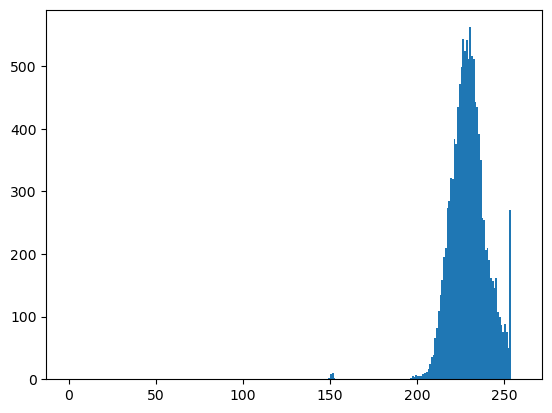

In [184]:
ls9_num, bins, _ = plt.hist(diffs, bins=np.arange(0, 260))

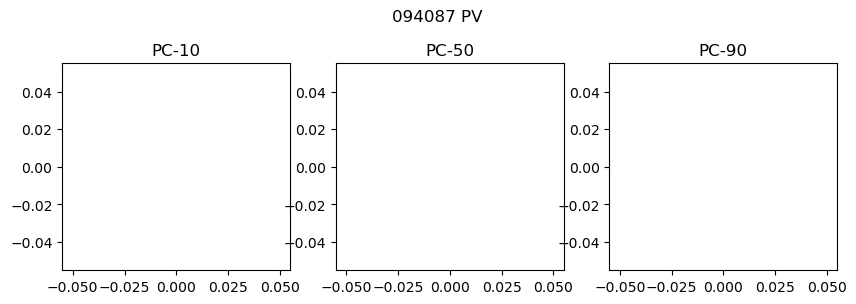

In [186]:
import matplotlib.pyplot as plt 

plot_percentile(band, 1, prc_10, prc_50, prc_90)

In [145]:
np.array(prc_50)[np.array(prc_50) > 200]

array([251., 250., 237., 240., 244., 243., 246., 240., 224., 207., 218.,
       225., 229., 229., 226., 225., 228., 242., 227., 224., 226., 232.,
       245., 238., 238., 240.])

In [39]:
def plot_percentile(band, n, prc_10, prc_50, prc_90):
    plt.figure(figsize=(10, 3))

    x_values = np.arange(len(prc_10))
    plt.subplot(n, 3, 1)
    plt.plot(x_values, prc_10, 'ro', label=f'PC-10 {band}')
    plt.title('PC-10')

    x_values = np.arange(len(prc_50))
    plt.subplot(n, 3, 2)
    plt.plot(x_values, prc_50, 'go', label=f'PC-50 {band}')
    plt.title('PC-50')

    x_values = np.arange(len(prc_90))
    plt.subplot(n, 3, 3)
    plt.plot(x_values, prc_90, 'bo', label=f'PC-90 {band}')    
    plt.title('PC-90')    
    plt.subplots_adjust(top=0.8)
    
    plt.suptitle(f'{a[0]} PV')
    # plt.savefig(f'{a[0]}_PV.png')

    plt.show()
    

In [141]:
# intersect_region.shape, ls9_data.shape, ls9_data.shape

In [142]:
# ls8_data.pv[0].plot.imshow()

In [143]:
# ls9_data[0].plot.imshow()

(119,)

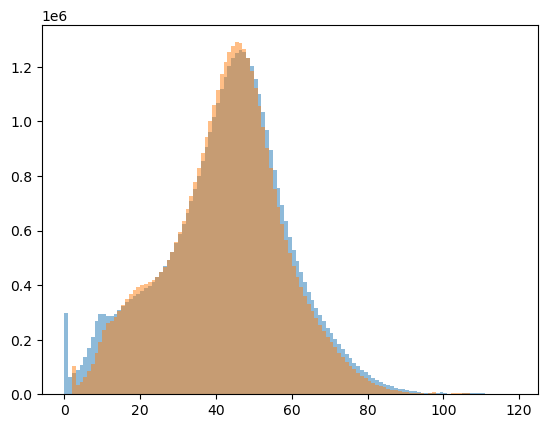

In [125]:
import matplotlib.pyplot as plt

ls9_num, bins, _ = plt.hist(ls9_data[0].sel(x=intersect_region.x, y=intersect_region.y).data.reshape(-1),
         bins=np.arange(0, 120),  alpha=0.5)
ls8_num, _, _ = plt.hist(ls8_data.pv[0].sel(x=intersect_region.x, y=intersect_region.y).data.reshape(-1),
         bins=np.arange(0, 120), alpha=0.5)

(ls9_num - ls8_num).shape

In [132]:
diff = ls9_data[0].sel(x=intersect_region.x, y=intersect_region.y).data.reshape(-1) - ls8_data.pv[0].sel(x=intersect_region.x, y=intersect_region.y).data.reshape(-1)

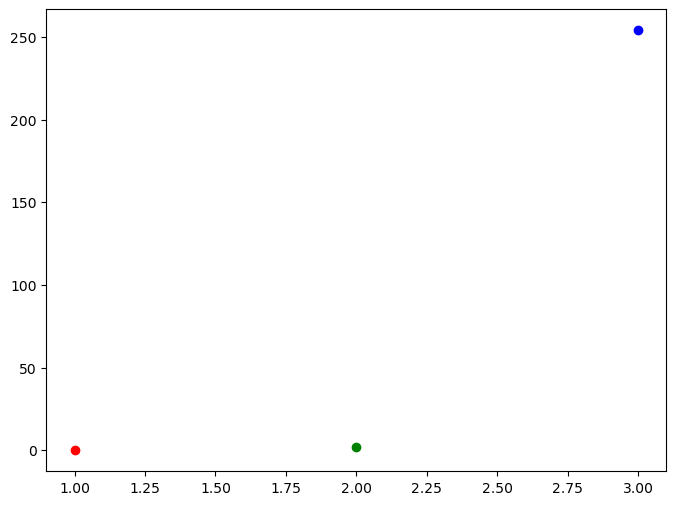